## Deuxième Partie : Essais




#### Importation des Packages

In [1]:
# Importation des bibliothèques standard
import os
from time import time
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

# Importation des bibliothèques de clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes


mpl.rcParams["figure.figsize"] = (12, 8)
init_notebook_mode()
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

#### Chargement de datasets

In [2]:
# On affiche les chemins menant à nos datasets.
data = pd.read_csv('data-clean-modelisation.csv')
data.head()

Unnamed: 0                customer_unique_id  nombre_de_commandes  \
0           0  0000366f3b9a7992bf8c76cfdf3221e2                    1   
1           1  0000b849f77a49e4a4ce2b2a4ca5be3f                    1   
2           2  0000f46a3911fa3c0805444483337064                    1   
3           3  0000f6ccb0745a6a4b88665a16c9f078                    1   
4           4  0004aac84e0df4da2b147fca70cf8255                    1   

   note_par_commande date_derniere_commande  paye_par_commande  \
0             135.90    2018-05-10 10:56:27                1.0   
1              21.90    2018-05-07 11:11:27                1.0   
2              95.00    2017-03-10 21:05:03                1.0   
3              45.99    2017-10-12 20:29:41                1.0   
4             193.00    2017-11-14 19:45:42                1.0   

   nb_paye_par_commande  mean_note_de_commentaire  mean_taille_de_commentaire  \
0                   8.0                       5.0                       111.0   
1                   1.0                       4.0                         0.0   
2                   8.0                       3.0                         0.0   
3                   4.0                       4.0                        12.0   
4                   6.0                       5.0                         0.0   

   mois_de_vente  mean_nombre_articles  mean_délai_de_commande  \
0              5                   1.0                   111.0   
1              5                   1.0                   114.0   
2              3                   1.0                   537.0   
3             10                   1.0                   321.0   
4             11                   1.0                   288.0   

   livraison_par_commande  mean_prix_commande  customer_zip_code_prefix  \
0                    0.04              129.90                      7787   
1                    0.14               18.90                      6053   
2                    0.27               69.00                     88115   
3                    0.43               25.99                     66812   
4                    0.07              180.00                     18040   

  customer_city customer_state  
0       cajamar             SP  
1        osasco             SP  
2      sao jose             SC  
3         belem             PA  
4      sorocaba             SP

In [3]:
# Supression de la colonne Unnamed: 31
del(data['Unnamed: 0'])

In [4]:
# On affiche la forme (nombre de lignes et de colonnes) du jeu de données "data".
data.shape

(93358, 16)

In [5]:
# On affiche les cinq(5) premières lignes
data.head()

customer_unique_id  nombre_de_commandes  note_par_commande  \
0  0000366f3b9a7992bf8c76cfdf3221e2                    1             135.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                    1              21.90   
2  0000f46a3911fa3c0805444483337064                    1              95.00   
3  0000f6ccb0745a6a4b88665a16c9f078                    1              45.99   
4  0004aac84e0df4da2b147fca70cf8255                    1             193.00   

  date_derniere_commande  paye_par_commande  nb_paye_par_commande  \
0    2018-05-10 10:56:27                1.0                   8.0   
1    2018-05-07 11:11:27                1.0                   1.0   
2    2017-03-10 21:05:03                1.0                   8.0   
3    2017-10-12 20:29:41                1.0                   4.0   
4    2017-11-14 19:45:42                1.0                   6.0   

   mean_note_de_commentaire  mean_taille_de_commentaire  mois_de_vente  \
0                       5.0                       111.0              5   
1                       4.0                         0.0              5   
2                       3.0                         0.0              3   
3                       4.0                        12.0             10   
4                       5.0                         0.0             11   

   mean_nombre_articles  mean_délai_de_commande  livraison_par_commande  \
0                   1.0                   111.0                    0.04   
1                   1.0                   114.0                    0.14   
2                   1.0                   537.0                    0.27   
3                   1.0                   321.0                    0.43   
4                   1.0                   288.0                    0.07   

   mean_prix_commande  customer_zip_code_prefix customer_city customer_state  
0              129.90                      7787       cajamar             SP  
1               18.90                      6053        osasco             SP  
2               69.00                     88115      sao jose             SC  
3               25.99                     66812         belem             PA  
4              180.00                     18040      sorocaba             SP

In [6]:
# Calculer le nombre de valeurs manquantes 
data.isna().sum()

customer_unique_id            0
nombre_de_commandes           0
note_par_commande             0
date_derniere_commande        0
paye_par_commande             0
nb_paye_par_commande          0
mean_note_de_commentaire      0
mean_taille_de_commentaire    0
mois_de_vente                 0
mean_nombre_articles          0
mean_délai_de_commande        0
livraison_par_commande        0
mean_prix_commande            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
dtype: int64

In [7]:
# On va utiliser les delais de livraisons et geolocalisation
data.dropna(inplace=True)

Convertir des colonnes de dates en formats de date

In [8]:
# Conversion des colonnes de date en formats de date appropriés :
data.date_derniere_commande=pd.to_datetime(data.date_derniere_commande)
data.mean_délai_de_commande=pd.to_timedelta(data.mean_délai_de_commande)

Afficher les dates du dernier achat et du premier achat dans les données du DataFrame 'data'.

#### On commence avec les trimestres

Filtrons ce dataframe en ne conservant que les lignes où la date de la dernière commande se situe entre le 1er janvier 2017 et le 1er juillet 2017.

In [10]:
# Filtrer les données en fonction de la date de la dernière commande :
filter_date = (data.date_derniere_commande>pd.to_datetime('2017-01-01')) &  (data.date_derniere_commande<pd.to_datetime('2017-07-01')) 
data = data[filter_date].copy()

In [11]:
# Afficher un aperçu des premières lignes d'un DataFrame
data

customer_unique_id  nombre_de_commandes  \
2      0000f46a3911fa3c0805444483337064                    1   
8      0005e1862207bf6ccc02e4228effd9a0                    1   
26     00115fc7123b5310cf6d3a3aa932699e                    1   
27     0011805441c0d1b68b48002f1d005526                    1   
28     0011857aff0e5871ce5eb429f21cdaf5                    1   
...                                 ...                  ...   
93336  ffedff0547d809c90c05c2691c51f9b7                    1   
93339  ffef0ffa736c7b3d9af741611089729b                    1   
93353  fffcf5a5ff07b0908bd4e2dbc735a684                    1   
93355  ffff371b4d645b6ecea244b27531430a                    1   
93357  ffffd2657e2aad2907e67c3e9daecbeb                    1   

       note_par_commande date_derniere_commande  paye_par_commande  \
2                  95.00    2017-03-10 21:05:03                1.0   
8                 139.00    2017-03-04 23:32:12                1.0   
26                 70.99    2017-01-21 21:58:35                1.0   
27                287.00    2017-04-24 13:36:48                1.0   
28                182.33    2017-06-28 11:08:38                1.0   
...                  ...                    ...                ...   
93336              29.90    2017-03-30 14:50:26                1.0   
93339             118.90    2017-05-29 22:07:05                1.0   
93353            1598.00    2017-06-08 21:00:36                1.0   
93355             104.90    2017-02-07 15:49:16                1.0   
93357              64.99    2017-05-02 20:18:45                1.0   

       nb_paye_par_commande  mean_note_de_commentaire  \
2                       8.0                       3.0   
8                       3.0                       4.0   
26                      1.0                       4.0   
27                     10.0                       3.0   
28                      3.0                       5.0   
...                     ...                       ...   
93336                   3.0                       5.0   
93339                   1.0                       5.0   
93353                  10.0                       5.0   
93355                   1.0                       5.0   
93357                   4.0                       5.0   

       mean_taille_de_commentaire  mois_de_vente  mean_nombre_articles  \
2                             0.0              3                   1.0   
8                             0.0              3                   1.0   
26                            0.0              1                   1.0   
27                            0.0              4                   1.0   
28                           48.0              6                   1.0   
...                           ...            ...                   ...   
93336                         0.0              3                   1.0   
93339                        30.0              5                   1.0   
93353                         0.0              6                   2.0   
93355                         0.0              2                   1.0   
93357                         0.0              5                   1.0   

         mean_délai_de_commande  livraison_par_commande  mean_prix_commande  \
2     0 days 00:00:00.000000537                    0.27               69.00   
8     0 days 00:00:00.000000543                    0.03              135.00   
26    0 days 00:00:00.000000585                    0.15               59.99   
27    0 days 00:00:00.000000492                    0.06              269.00   
28    0 days 00:00:00.000000427                    0.04              174.33   
...                         ...                     ...                 ...   
93336 0 days 00:00:00.000000517                    0.40               17.90   
93339 0 days 00:00:00.000000457                    0.08              109.90   
93353 0 days 00:00:00.000000447                    0.02             1570.00   
93355 0 days 00:00:00.000000568                

In [12]:
# Supprimer plusieurs colonnes spécifiées du DataFrame 'data'.
data.drop(['customer_unique_id',
'customer_city',
'customer_state','customer_zip_code_prefix'], axis=1, inplace=True)

In [13]:
# Calcul de la différence entre la date de commande maximale et les dates de commande dans df_trim
data.date_derniere_commande = data.date_derniere_commande.max() - data.date_derniere_commande

### Score RFM


On effectue le calcul des scores RFM (Récence, Fréquence, Montant) pour un ensemble de données représenté par le DataFrame 'data'. Il utilise des fonctions de quantile pour attribuer les scores RFM en fonction des valeurs des dimensions R, F et M dans les données.

In [14]:
def cal_quantile(col):
    '''
    Input : colonne a quantifier
    output : valeur RFM pour la colonne
    '''
    df = pd.DataFrame(col)
    quantil25 = col.quantile(q=0.25)
    quantil50 = col.quantile(q=0.5)
    quantil75 = col.quantile(q=0.75)
#    print(quantil25, quantil50, quantil75)
    df.loc[(col<quantil25), 'RFM'] = 1
    df.loc[(col>=quantil25) & (col<quantil50), 'RFM'] = 2
    df.loc[(col>=quantil50) & (col<quantil75), 'RFM'] = 3
    df.loc[(col>=quantil75), 'RFM'] = 4
    return(df.RFM)

def cal_quantile_minmax(col):
    '''
    Input : colonne a quantifier en MinMAx car trop asymetriqeue
    output : valeur RFM pour la colonne
    '''
    df = pd.DataFrame(col)
    quantil25 = (col.max()-1)/4
    quantil50 = (col.max()-1)/2
    quantil75 = (col.max()-1)*3/4
#    print(quantil25, quantil50, quantil75)
    df.loc[(col<quantil25), 'RFM'] = 1
    df.loc[(col>=quantil25) & (col<quantil50), 'RFM'] = 2
    df.loc[(col>=quantil50) & (col<quantil75), 'RFM'] = 3
    df.loc[(col>=quantil75), 'RFM'] = 4
    return(df.RFM)


def calcul_RFM(df):
    '''
    Input: DataFrame to calculate the score and the RFM string
    Output: Columns RFM_R, RFM_F, RFM_M, RFM, str_RFM
    '''
    # Calculate RFM_R
    df['RFM_R'] = cal_quantile(-df.date_derniere_commande)
    
    # Calculate RFM_F
    df['RFM_F'] = cal_quantile_minmax(df.nombre_de_commandes)
    
    # Calculate RFM_M
    df['RFM_M'] = cal_quantile(df.paye_par_commande)
    
    return df[['RFM_R', 'RFM_F', 'RFM_M']]

# Assuming you have the DataFrame df_trim properly loaded

# Call the calcul_RFM function and update the RFM columns in df_trim
data[['RFM_R', 'RFM_F', 'RFM_M']] = calcul_RFM(data.copy())


On modifie les colonnes RFM_R, RFM_F et RFM_M du DataFrame data en les convertissant en types de données entiers. Cela peut être utile pour des raisons d'affichage, de calculs ultérieurs ou de compatibilité avec certaines opérations qui nécessitent des nombres entiers.

In [15]:
data['RFM_R'] = data['RFM_R'].astype(int)
data['RFM_F'] = data['RFM_F'].astype(int)
data['RFM_M'] = data['RFM_M'].astype(int)

On complète le processus de calcul des scores RFM en créant une colonne RFM contenant le score RFM global calculé en additionnant les scores individuels pour chaque dimension. Il crée également une colonne str_RFM qui représente la concaténation textuelle des scores individuels pour chaque dimension, donnant ainsi une représentation lisible du score RFM global.

In [16]:
data['RFM'] = data['RFM_R'] + data['RFM_F'] + data['RFM_M']
data['str_RFM'] = data['RFM_R'].apply(str) + data['RFM_F'].apply(str) + data['RFM_M'].apply(str)

In [17]:
data

nombre_de_commandes  note_par_commande date_derniere_commande  \
2                        1              95.00      112 days 02:15:05   
8                        1             139.00      117 days 23:47:56   
26                       1              70.99      160 days 01:21:33   
27                       1             287.00       67 days 09:43:20   
28                       1             182.33        2 days 12:11:30   
...                    ...                ...                    ...   
93336                    1              29.90       92 days 08:29:42   
93339                    1             118.90       32 days 01:13:03   
93353                    1            1598.00       22 days 02:19:32   
93355                    1             104.90      143 days 07:30:52   
93357                    1              64.99       59 days 03:01:23   

       paye_par_commande  nb_paye_par_commande  mean_note_de_commentaire  \
2                    1.0                   8.0                       3.0   
8                    1.0                   3.0                       4.0   
26                   1.0                   1.0                       4.0   
27                   1.0                  10.0                       3.0   
28                   1.0                   3.0                       5.0   
...                  ...                   ...                       ...   
93336                1.0                   3.0                       5.0   
93339                1.0                   1.0                       5.0   
93353                1.0                  10.0                       5.0   
93355                1.0                   1.0                       5.0   
93357                1.0                   4.0                       5.0   

       mean_taille_de_commentaire  mois_de_vente  mean_nombre_articles  \
2                             0.0              3                   1.0   
8                             0.0              3                   1.0   
26                            0.0              1                   1.0   
27                            0.0              4                   1.0   
28                           48.0              6                   1.0   
...                           ...            ...                   ...   
93336                         0.0              3                   1.0   
93339                        30.0              5                   1.0   
93353                         0.0              6                   2.0   
93355                         0.0              2                   1.0   
93357                         0.0              5                   1.0   

         mean_délai_de_commande  livraison_par_commande  mean_prix_commande  \
2     0 days 00:00:00.000000537                    0.27               69.00   
8     0 days 00:00:00.000000543                    0.03              135.00   
26    0 days 00:00:00.000000585                    0.15               59.99   
27    0 days 00:00:00.000000492                    0.06              269.00   
28    0 days 00:00:00.000000427                    0.04              174.33   
...                         ...                     ...                 ...   
93336 0 days 00:00:00.000000517                    0.40               17.90   
93339 0 days 00:00:00.000000457                    0.08              109.90   
93353 0 days 00:00:00.000000447                    0.02             1570.00   
93355 0 days 00:00:00.000000568                    0.14               89.90   
93357 0 days 00:00:00.000000484                    0.12               56.99   

       RFM_R  RFM_F  RFM_M  RFM str_RFM  
2          1      1      4    6     114  
8          1      1      4    6     114  
26         1      1      4    6     114  
27         2      1      4    7     214  
28         4      1      4    9     414  
...      ...    ...    ...  ...     ...  
93336      2      1      4    7     214  
93339      4      1      4    9     414  
93353      4 

On créait un histogramme et un tracé de densité de noyau pour les scores RFM

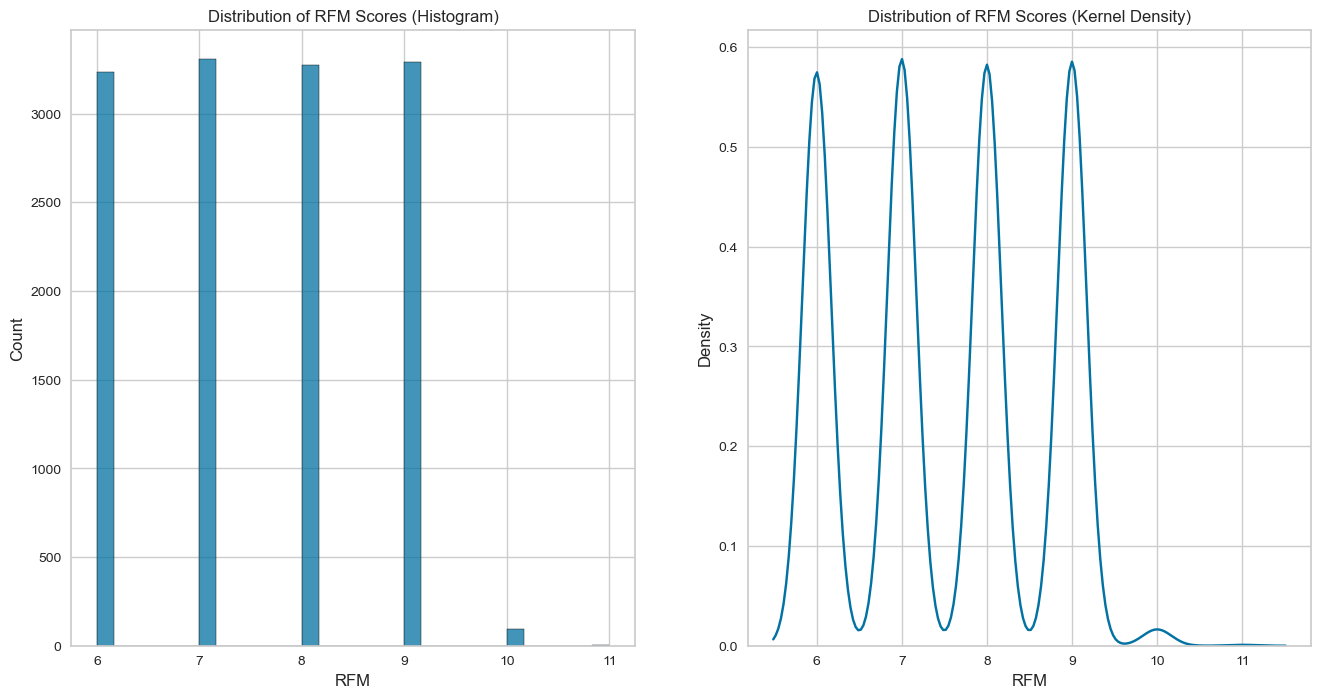

In [18]:
# Set up the figure and subplots
plt.figure(figsize=(16, 8))

# Create a histogram and a kernel density plot for the RFM scores
plt.subplot(1, 2, 1)  # First subplot
sns.histplot(data.RFM)
plt.title("Distribution of RFM Scores (Histogram)")

plt.subplot(1, 2, 2)  # Second subplot
sns.kdeplot(data.RFM)
plt.title("Distribution of RFM Scores (Kernel Density)")
#plt.plot([7.5,7.5], [0, 0.07], color='red', alpha = 0.5)
#plt.plot([17.5,17.5], [0, 0.07], color='red', alpha = 0.5)
#plt.plot([35,35], [0, 0.07], color='red', alpha = 0.5)
# Display the plots
plt.show()

- On génère un graphique avec deux sous-graphiques côte à côte. Le premier sous-graphique montre la distribution des scores RFM sous forme d'histogramme, et le deuxième sous-graphique montre la distribution des scores RFM à l'aide de l'estimation de densité du noyau. Cela permet de visualiser la répartition des scores RFM et d'obtenir une meilleure compréhension de leur distribution dans les données.

Créer un diagramme de dispersion des scores RFM triés par index

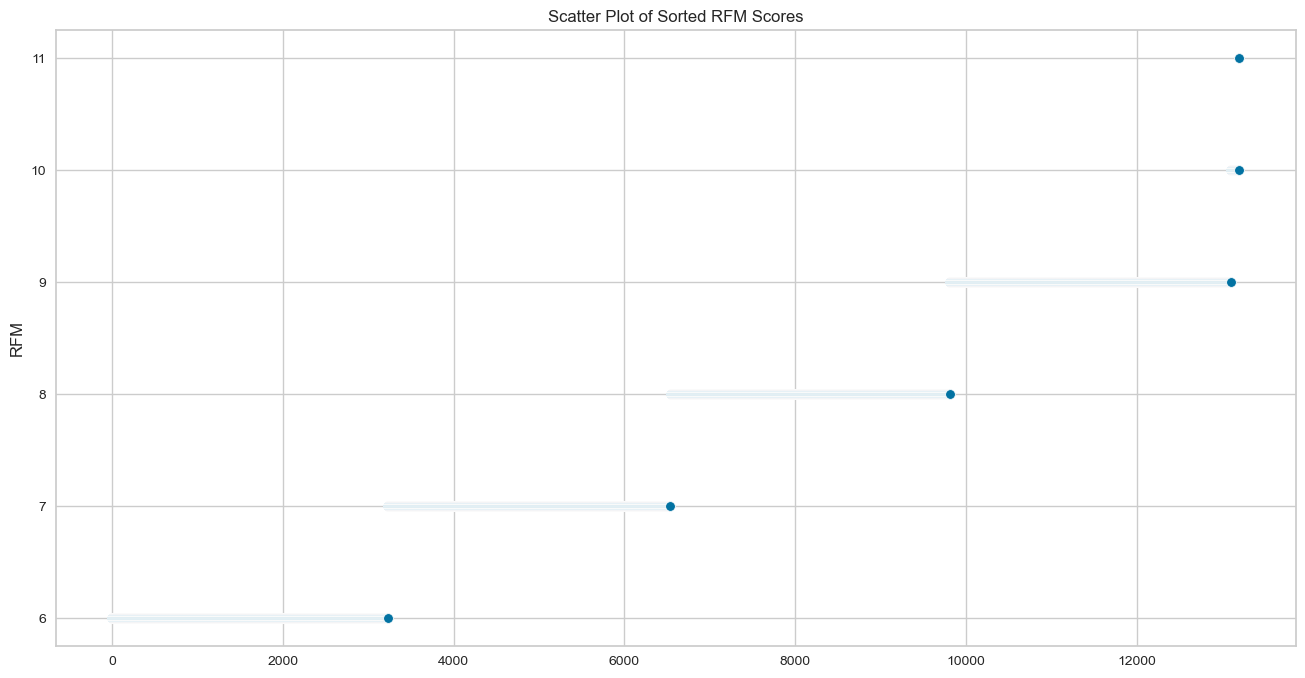

In [19]:
# Configurer la figure et la taille
plt.figure(figsize=(16, 8))

# Créer un diagramme de dispersion des scores RFM triés par index
sns.scatterplot(x=np.arange(len(data.RFM)), y=data.RFM.sort_values())
plt.title("Scatter Plot of Sorted RFM Scores")

# Afficher le tracé
plt.show()


- On génère un diagramme de dispersion des scores RFM triés par index. Le diagramme permet de visualiser comment les scores RFM se répartissent lorsque les données sont ordonnées selon leur position dans le DataFrame. Cela peut être utile pour repérer des tendances ou des motifs dans la distribution des scores RFM.

On itère à travers une plage de nombres décroissante de 12 à 2, puis pour chaque valeur de la boucle, il calcule et affiche la moyenne des scores RFM_R, RFM_F et RFM_M pour les lignes ayant le score RFM égal à cette valeur. Cela permet d'analyser comment les scores RFM se comportent pour différentes valeurs dans cette plage.

In [20]:
for i in range(12,2,-1):
    print(f"{i:02d} RFM_R = {data.loc[(data.RFM==i),'RFM_R'].mean():.2f} RFM_F = {data.loc[(data.RFM==i),'RFM_F'].mean():.2f} RFM_M = {data.loc[(data.RFM==i),'RFM_M'].mean():.2f}")

12 RFM_R = nan RFM_F = nan RFM_M = nan
11 RFM_R = 4.00 RFM_F = 3.00 RFM_M = 4.00
10 RFM_R = 3.95 RFM_F = 2.05 RFM_M = 4.00
09 RFM_R = 3.97 RFM_F = 1.03 RFM_M = 4.00
08 RFM_R = 2.98 RFM_F = 1.02 RFM_M = 4.00
07 RFM_R = 1.98 RFM_F = 1.02 RFM_M = 4.00
06 RFM_R = 1.00 RFM_F = 1.00 RFM_M = 4.00
05 RFM_R = nan RFM_F = nan RFM_M = nan
04 RFM_R = nan RFM_F = nan RFM_M = nan
03 RFM_R = nan RFM_F = nan RFM_M = nan


Compter combien de fois chaque valeur de la colonne 'str_RFM' apparaît dans les lignes où la colonne 'RFM' est égale à 10 dans le DataFrame 'data'.

In [21]:
# Comptage des valeurs de la colonne 'str_RFM' pour lesquelles 'RFM' est égal à 10 :
data.loc[(data.RFM==10), 'str_RFM'].value_counts()

424    88
334     3
244     1
Name: str_RFM, dtype: int64

Supprimer la colonne spécifique nommée "str_RFM"

In [22]:
# Suppression de la colonne "str_RFM" du DataFrame 'data' :
data.drop(["str_RFM"],axis=1, inplace=True)

In [23]:
data.head(10)

nombre_de_commandes  note_par_commande date_derniere_commande  \
2                     1              95.00      112 days 02:15:05   
8                     1             139.00      117 days 23:47:56   
26                    1              70.99      160 days 01:21:33   
27                    1             287.00       67 days 09:43:20   
28                    1             182.33        2 days 12:11:30   
34                    1              62.90       72 days 11:47:59   
41                    1              27.88        1 days 00:36:19   
46                    1              35.88      103 days 04:45:32   
47                    1             200.99       96 days 06:34:09   
59                    1              58.90      149 days 09:26:52   

    paye_par_commande  nb_paye_par_commande  mean_note_de_commentaire  \
2                 1.0                   8.0                       3.0   
8                 1.0                   3.0                       4.0   
26                1.0                   1.0                       4.0   
27                1.0                  10.0                       3.0   
28                1.0                   3.0                       5.0   
34                1.0                   2.0                       3.0   
41                1.0                   1.0                       4.0   
46                1.0                   3.0                       3.0   
47                1.0                   4.0                       4.0   
59                1.0                   1.0                       2.0   

    mean_taille_de_commentaire  mois_de_vente  mean_nombre_articles  \
2                          0.0              3                   1.0   
8                          0.0              3                   1.0   
26                         0.0              1                   1.0   
27                         0.0              4                   1.0   
28                        48.0              6                   1.0   
34                         0.0              4                   1.0   
41                         0.0              6                   1.0   
46                         0.0              3                   1.0   
47                         0.0              3                   1.0   
59                        21.0              2                   1.0   

      mean_délai_de_commande  livraison_par_commande  mean_prix_commande  \
2  0 days 00:00:00.000000537                    0.27               69.00   
8  0 days 00:00:00.000000543                    0.03              135.00   
26 0 days 00:00:00.000000585                    0.15               59.99   
27 0 days 00:00:00.000000492                    0.06              269.00   
28 0 days 00:00:00.000000427                    0.04              174.33   
34 0 days 00:00:00.000000497                    0.24               47.90   
41 0 days 00:00:00.000000426                    0.11               24.88   
46 0 days 00:00:00.000000528                    0.31               24.88   
47 0 days 00:00:00.000000521                    0.12              176.99   
59 0 days 00:00:00.000000574                    0.15               49.90   

    RFM_R  RFM_F  RFM_M  RFM  
2       1      1      4    6  
8       1      1      4    6  
26      1      1      4    6  
27      2      1      4    7  
28      4      1      4    9  
34      2      1      4    7  
41      4      1      4    9  
46      2      1      4    7  
47      2      1      4    7  
59      1      1      4    6

In [24]:
###data.to_csv('data_simulation.csv')

### Clustering avec l'algorithme du K-Means


##### On prepare ensuite le preprocessor :

Créer un nouveau DataFrame appelé 'data_cluster' en copiant certaines colonnes spécifiques du DataFrame 'data'. Les colonnes sélectionnées sont ensuite disponibles dans le nouveau DataFrame.

In [25]:
# Création d'un nouveau DataFrame 'data_cluster' en copiant certaines colonnes de 'data' :
data_cluster = data[['nombre_de_commandes',
 'note_par_commande',
 'paye_par_commande',
 'nb_paye_par_commande',
 'mean_note_de_commentaire',
 'mean_taille_de_commentaire',
 'mois_de_vente',
 'mean_nombre_articles',
 'livraison_par_commande',
 'mean_prix_commande',
 'date_derniere_commande',
 'mean_délai_de_commande',
 'RFM_R',
 'RFM_F',
 'RFM_M',
 'RFM',]].copy()

Identifier et stocker les caractéristiques catégorielles

In [26]:
# Identification des caractéristiques catégorielles dans le DataFrame 'data_cluster' :
categorical_features = list(data_cluster.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)
categorical_features

['date_derniere_commande', 'mean_délai_de_commande']

 Identifier et stocker les caractéristiques numériques présentes dans le DataFrame 'data_cluster'.

In [27]:
# Identification des caractéristiques numériques dans le DataFrame 'data_cluster' :
numerical_features = list(data_cluster.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['nombre_de_commandes',
 'note_par_commande',
 'paye_par_commande',
 'nb_paye_par_commande',
 'mean_note_de_commentaire',
 'mean_taille_de_commentaire',
 'mois_de_vente',
 'mean_nombre_articles',
 'livraison_par_commande',
 'mean_prix_commande',
 'RFM_R',
 'RFM_F',
 'RFM_M',
 'RFM']

Prétraitement des caractéristiques numériques en utilisant la mise à l'échelle Min-Max à l'aide du préprocesseur 'preprocessor'.

In [28]:
# Prétraitement des caractéristiques numériques avec une mise à l'échelle Min-Max :
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

Convertir toutes les colonnes du DataFrame 'data_cluster' en format numérique

In [29]:
# Convertir toutes les colonnes du DataFrame en numérique
data_cluster = data_cluster.apply(pd.to_numeric, errors='coerce')

In [30]:
data_cluster.head(10)

nombre_de_commandes  note_par_commande  paye_par_commande  \
2                     1              95.00                1.0   
8                     1             139.00                1.0   
26                    1              70.99                1.0   
27                    1             287.00                1.0   
28                    1             182.33                1.0   
34                    1              62.90                1.0   
41                    1              27.88                1.0   
46                    1              35.88                1.0   
47                    1             200.99                1.0   
59                    1              58.90                1.0   

    nb_paye_par_commande  mean_note_de_commentaire  \
2                    8.0                       3.0   
8                    3.0                       4.0   
26                   1.0                       4.0   
27                  10.0                       3.0   
28                   3.0                       5.0   
34                   2.0                       3.0   
41                   1.0                       4.0   
46                   3.0                       3.0   
47                   4.0                       4.0   
59                   1.0                       2.0   

    mean_taille_de_commentaire  mois_de_vente  mean_nombre_articles  \
2                          0.0              3                   1.0   
8                          0.0              3                   1.0   
26                         0.0              1                   1.0   
27                         0.0              4                   1.0   
28                        48.0              6                   1.0   
34                         0.0              4                   1.0   
41                         0.0              6                   1.0   
46                         0.0              3                   1.0   
47                         0.0              3                   1.0   
59                        21.0              2                   1.0   

    livraison_par_commande  mean_prix_commande  date_derniere_commande  \
2                     0.27               69.00        9684905000000000   
8                     0.03              135.00       10194476000000000   
26                    0.15               59.99       13828893000000000   
27                    0.06              269.00        5823800000000000   
28                    0.04              174.33         216690000000000   
34                    0.24               47.90        6263279000000000   
41                    0.11               24.88          88579000000000   
46                    0.31               24.88        8916332000000000   
47                    0.12              176.99        8318049000000000   
59                    0.15               49.90       12907612000000000   

    mean_délai_de_commande  RFM_R  RFM_F  RFM_M  RFM  
2                      537      1      1      4    6  
8                      543      1      1      4    6  
26                     585      1      1      4    6  
27                     492      2      1      4    7  
28                     427      4      1      4    9  
34                     497      2      1      4    7  
41                     426      4      1      4    9  
46                     528      2      1      4    7  
47                     521      2      1      4    7  
59                     574      1      1      4    6

Visualisation des données numériques avec des boîtes à moustaches (boxplots) et des histogrammes 

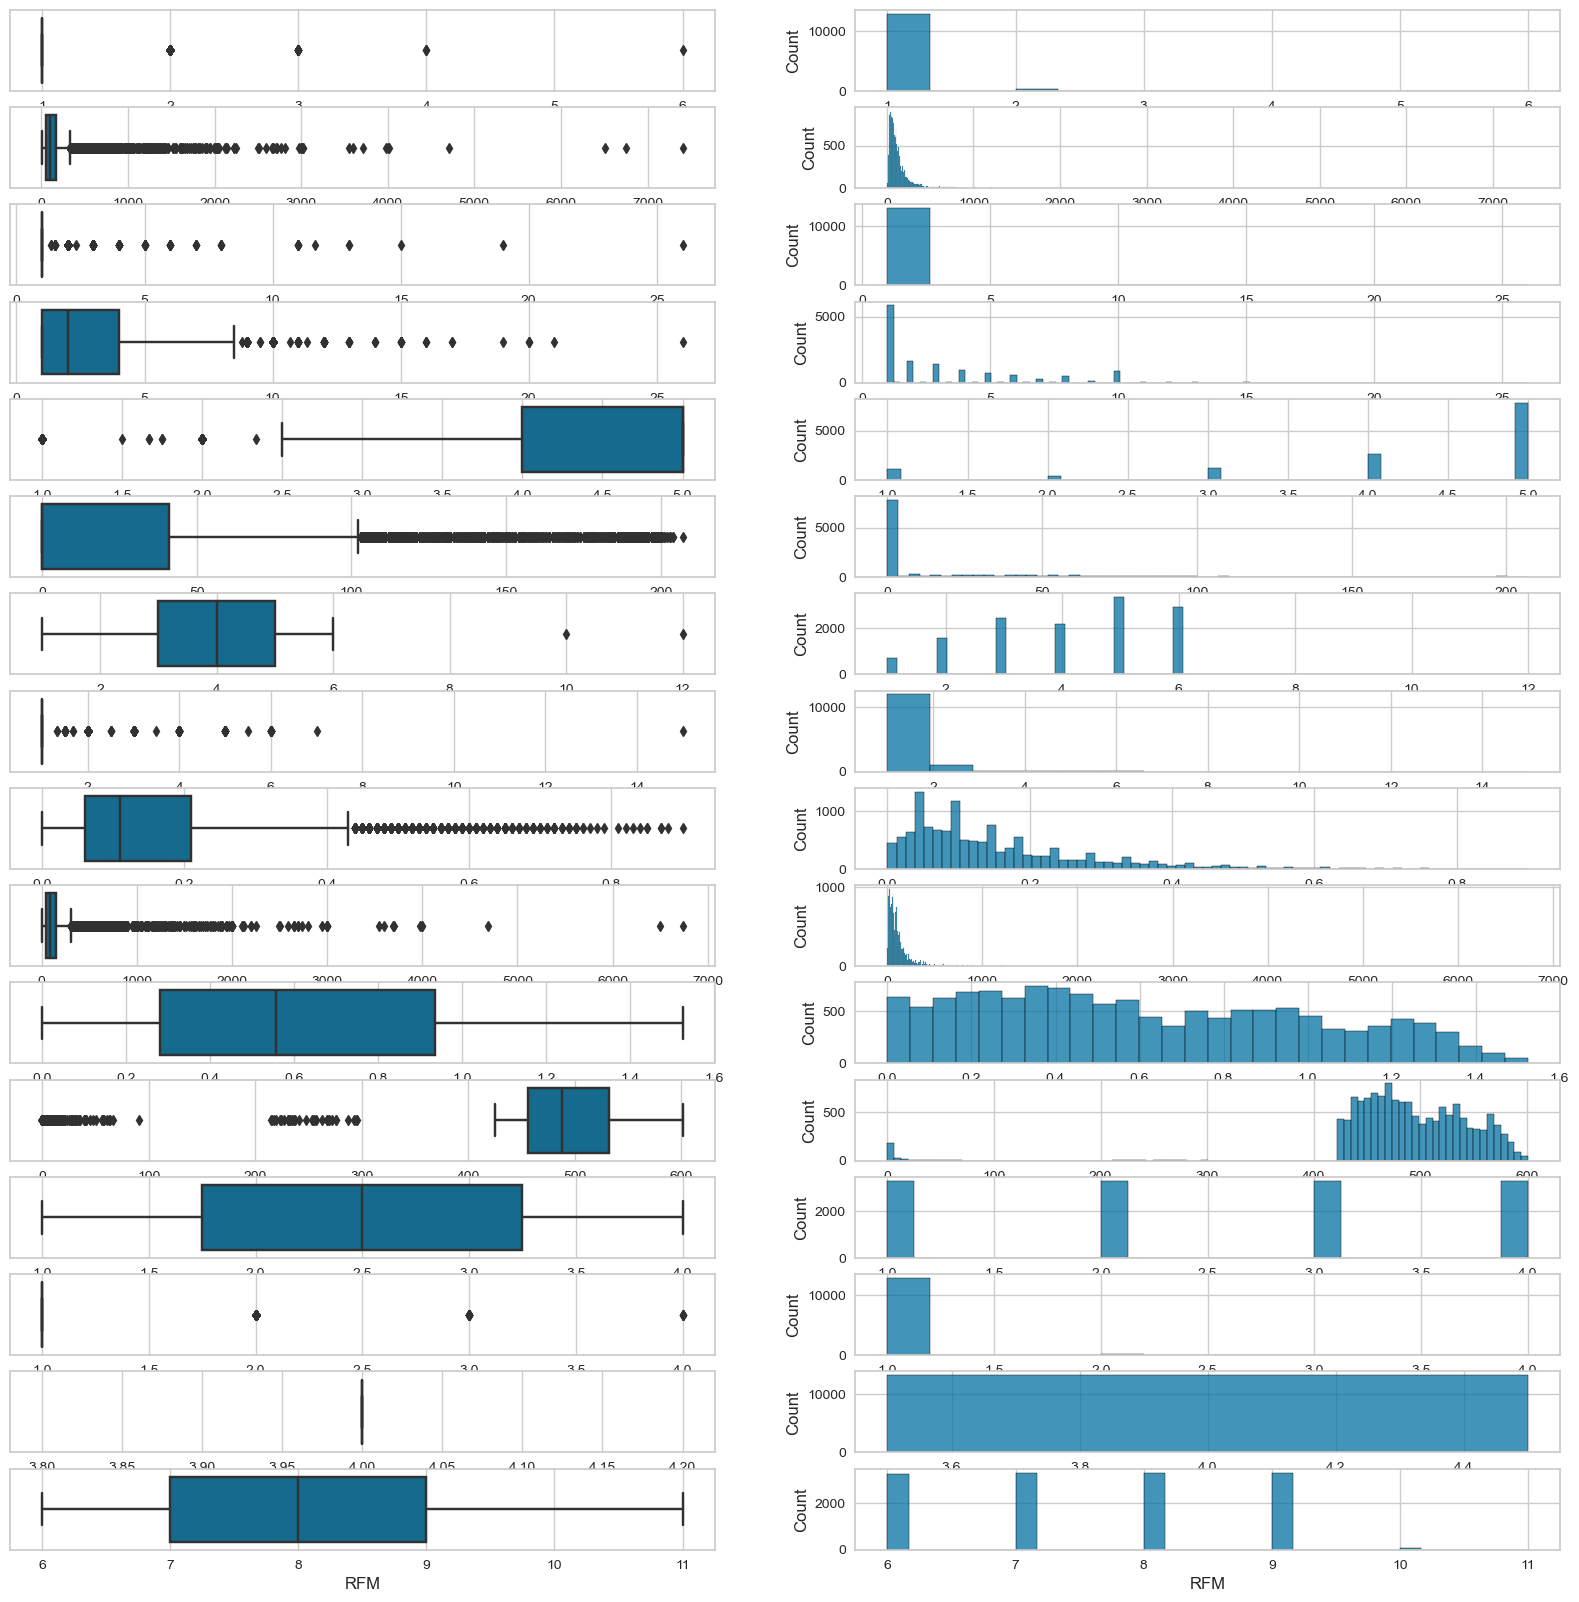

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
nb_colonne = len(data_cluster.columns)

for i in range(0, nb_colonne):
    plt.subplot(nb_colonne, 2, 2 * i + 1)
    sns.boxplot(x=data_cluster.iloc[:, i], orient='vertical')  # Utilisez 'vertical' en minuscules
    plt.subplot(nb_colonne, 2, 2 * (i + 1))
    sns.histplot(x=data_cluster.iloc[:, i])

plt.savefig('P2_20_FE_0.jpg')
plt.show()


On applique la transformation logarithmique (log1p) à deux colonnes spécifiques du DataFrame data_cluster, ce qui peut aider à stabiliser la distribution des valeurs et à mieux adapter les données pour une analyse statistique ou pour construire des modèles.

In [32]:
data_cluster.paye_par_commande = np.log1p(data_cluster.paye_par_commande)
data_cluster.mean_prix_commande = np.log1p(data_cluster.mean_prix_commande)

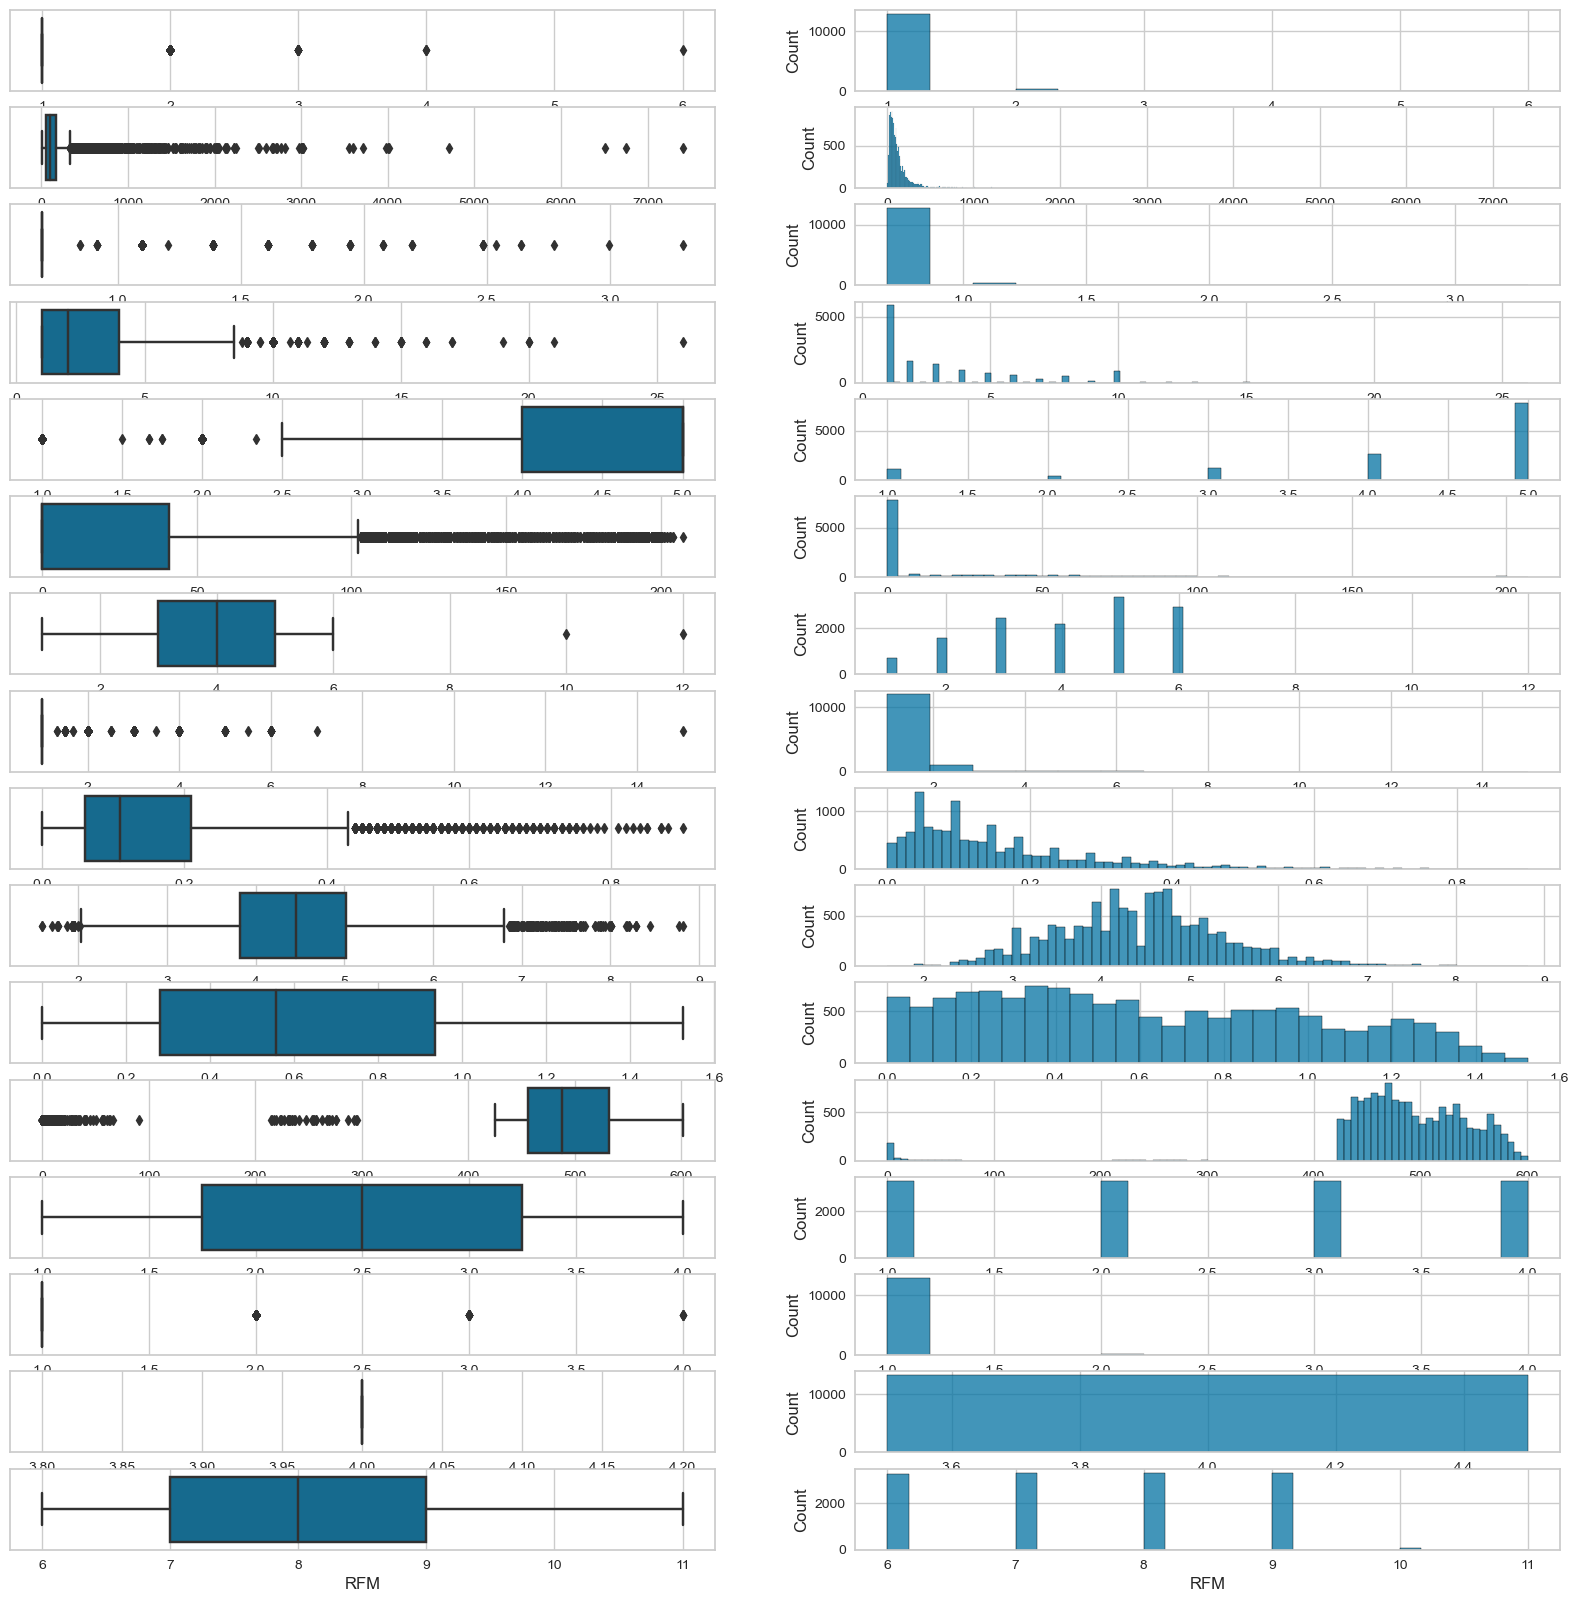

In [33]:
plt.figure(figsize=(20,20))
nb_colonne = len(data_cluster.columns)
for i in range(0,nb_colonne):
    plt.subplot(nb_colonne,2,2*i+1)
    sns.boxplot(x = data_cluster.iloc[:,i], orient='Vertical')
    plt.subplot(nb_colonne,2,2*(i+1))
    sns.histplot(x = data_cluster.iloc[:,i])
plt.savefig('P2_20_FE_1_log.jpg')
plt.show()

On effectue une analyse de la méthode du coude en utilisant l'algorithme K-Means pour déterminer le nombre optimal de clusters pour regrouper les données transformées X. Il trace ensuite un graphique montrant la relation entre le nombre de clusters et l'inertie totale, ce qui peut aider à choisir le nombre approprié de clusters pour une tâche de regroupement.

#### La méthode du coude est utilisée pour déterminer le meilleur nombre de clusters

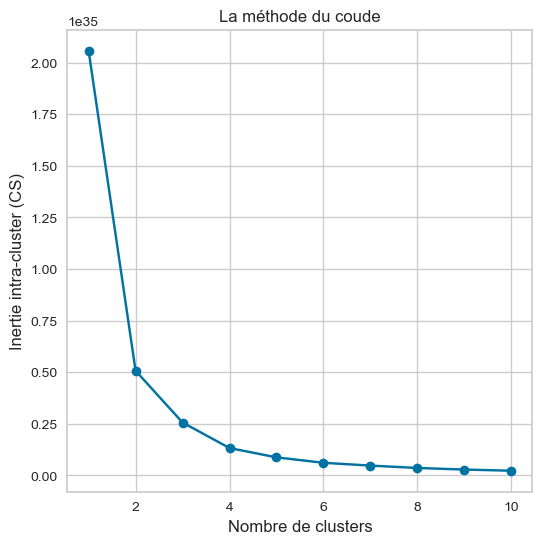

In [34]:
X = data_cluster.copy()
# Créer une liste vide pour stocker les valeurs de l'inertie (cs)
cs = []
# Parcourir un nombre de clusters de 1 à 10
for i in range(1, 11):
    # Créer un modèle KMeans avec les paramètres spécifiés
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++',
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 0)
    # Adapter le modèle aux données normalisées X_std 
    kmeans.fit(X)
    # Ajouter l'inertie du modèle à la liste cs
    cs.append(kmeans.inertia_)
# Créer une figure avec une taille spécifiée
plt.figure(figsize=(6, 6))
# Tracer le graphique en utilisant le nombre de clusters sur l'axe des x et l'inertie (CS) sur l'axe des y
plt.plot(range(1, 11), cs, marker='o')
# Ajouter un titre au graphique
plt.title('La méthode du coude')
# Ajouter une étiquette à l'axe des x
plt.xlabel('Nombre de clusters')
# Ajouter une étiquette à l'axe des y
plt.ylabel('Inertie intra-cluster (CS)')
# Afficher le graphique
plt.show()

On affiche des graphiques du score de silhouette pour différentes valeurs de clusters obtenues à partir de l'algorithme K-Means. Chaque graphique montre comment les données se répartissent dans les clusters et évalue la qualité des clusters générés pour chaque valeur de clusters. Chaque graphique est ensuite sauvegardé avec un nom de fichier spécifique indiquant le nombre de clusters.

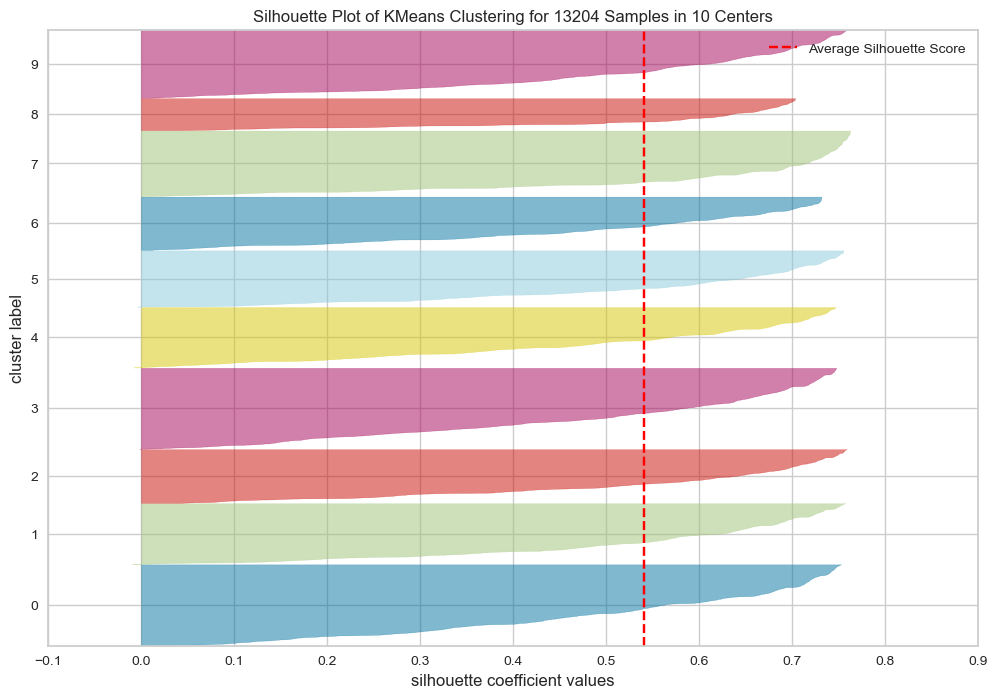

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 13204 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
# Création d'un modèle K-Means avec un nombre de clusters (i)
model = KMeans(i, random_state=1944)
# Initialisation d'un visualizer Silhouette avec le modèle et des couleurs appropriées
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
# Ajustement du visualizer aux données
visualizer.fit(X) 
# Sauvegarde de la visualisation
savef = 'P2_07_silhouette_score_KMEANS_nbcluster-'+str(i)+'.jpg'
plt.savefig(savef)
# Affichage de la visualisation Silhouette
visualizer.show()    

L'objet km contiendra les informations sur les clusters trouvés, notamment les positions des centres de cluster et les attributions de cluster pour chaque point de données.

- On utilise l'algorithme K-Means pour effectuer une opération de clustering sur un ensemble de données normalisées.

In [36]:
# Création d'une instance du modèle K-Means avec les paramètres spécifiés
km = KMeans(n_clusters=8,        # Nombre de clusters souhaité
            init='k-means++',     # Méthode d'initialisation des centroïdes
            max_iter=300,         # Nombre maximal d'itérations pour la convergence
            n_init=10,            # Nombre d'initialisations différentes
            random_state=0)       # Graine pour la reproductibilité des résultats

# Ajustement du modèle aux données normalisées (X_std)
km.fit(X)

KMeans(n_init=10, random_state=0)

Utilisation de l'algorithme DBSCAN pour le clustering

- On utilise l'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) pour effectuer une opération de clustering sur un ensemble de données normalisées.

In [37]:
from sklearn.cluster import DBSCAN
# Création d'une instance du modèle DBSCAN avec les paramètres spécifiés
dbs = DBSCAN(eps=0.05,         # Rayon (epsilon) pour définir la proximité des points
             min_samples=5,    # Nombre minimum d'échantillons requis pour former un cluster
             n_jobs=-1)        # Nombre de tâches à exécuter en parallèle (-1 utilise tous les cœurs disponibles)

# Ajustement du modèle aux données normalisées (X_std)
dbs.fit(X)

DBSCAN(eps=0.05, n_jobs=-1)

Réduction de dimension avec PCA (Principal Component Analysis)


On utilise l'algorithme PCA (Principal Component Analysis) pour réduire la dimension des données.

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=1944)
X_pca = pca.fit_transform(X)

In [39]:
centroids = km.cluster_centers_
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
print(centroids)
centroids_pca = pca.transform(centroids)

[[1.03181336e+00 1.48153256e+02 7.15005244e-01 3.28985507e+00
  4.24522800e+00 2.57878226e+01 5.67338282e+00 1.11770944e+00
  1.46548250e-01 4.41731914e+00 2.29493892e+15 4.38857370e+02
  3.86850477e+00 1.03181336e+00 4.00000000e+00 8.90031813e+00]
 [1.01980983e+00 1.52009707e+02 7.14041754e-01 2.82474908e+00
  4.20859746e+00 2.85134046e+01 1.99841521e+00 1.12493397e+00
  1.64920761e-01 4.38619919e+00 1.17412679e+16 5.51768621e+02
  1.00000000e+00 1.01980983e+00 4.00000000e+00 6.01980983e+00]
 [1.01894965e+00 1.53740568e+02 7.13528888e-01 3.36635986e+00
  4.13357246e+00 2.63158049e+01 4.33297239e+00 1.12867713e+00
  1.75165133e-01 4.44973595e+00 5.59592737e+15 4.81694640e+02
  2.49160801e+00 1.01894965e+00 4.00000000e+00 7.51055766e+00]
 [1.01651073e+00 1.59439281e+02 7.12350669e-01 3.03256283e+00
  4.18985049e+00 2.72040681e+01 2.95542102e+00 1.14556962e+00
  1.48332416e-01 4.46008528e+00 9.58597661e+15 5.27689598e+02
  1.38965327e+00 1.01651073e+00 4.00000000e+00 6.40616401e+00]
 [1.

##### Comparaison visuelle entre les résultats de K-Means et de DBSCAN

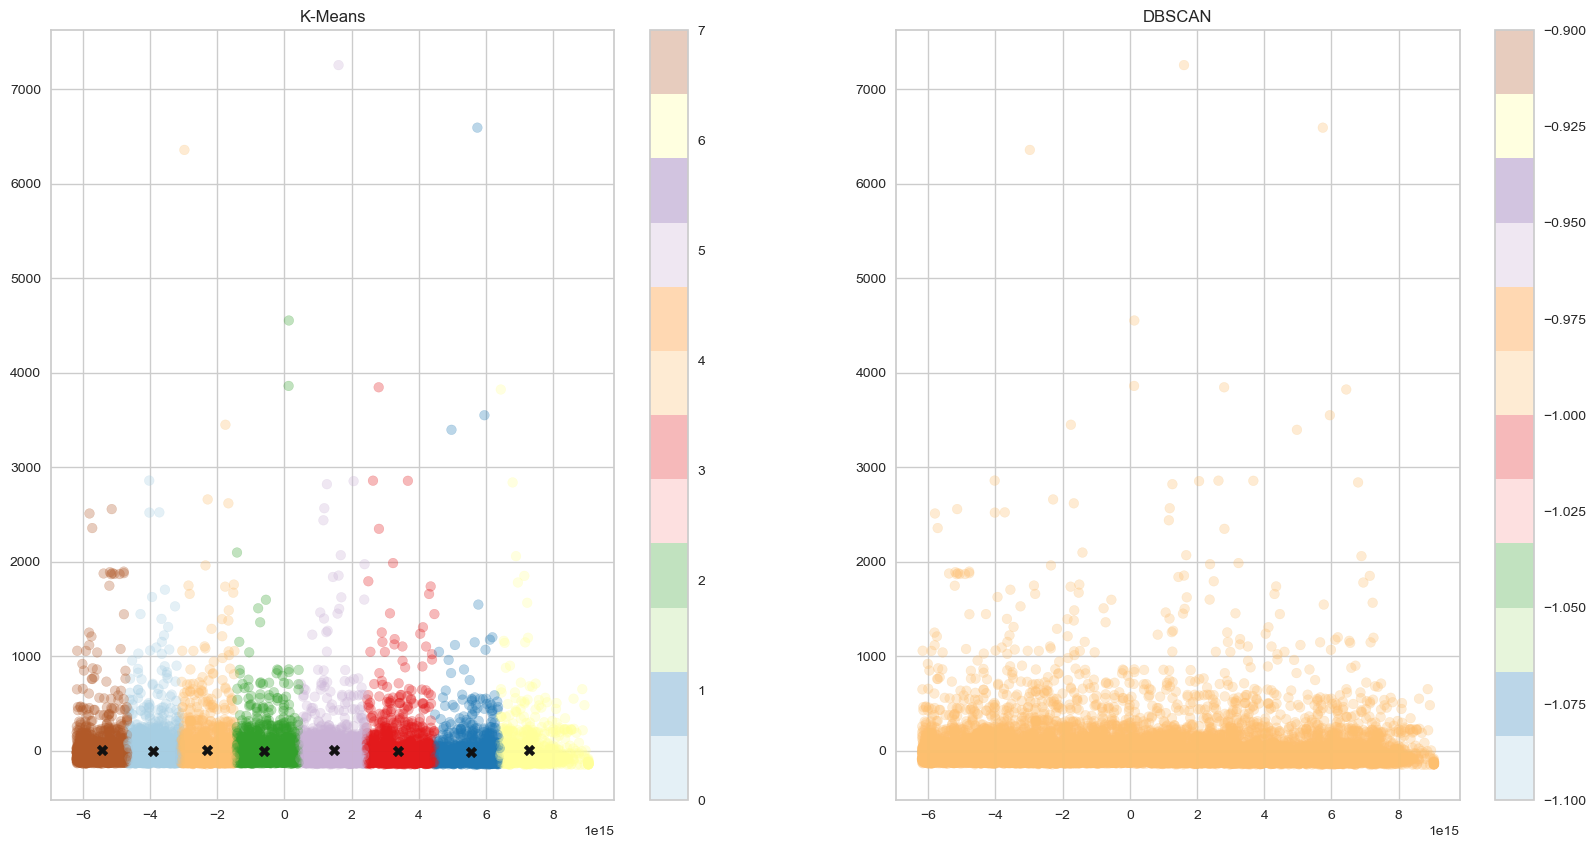

In [40]:
# Création d'une figure avec deux sous-graphiques
plt.figure(figsize=(20, 10))

# Sous-graphique pour K-Means
plt.subplot(1, 2, 1)
plt.title('K-Means')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, alpha=0.3, cmap='Paired')
plt.colorbar()
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=60, color='k', marker='X')

# Sous-graphique pour DBSCAN
plt.subplot(1, 2, 2)
plt.title('DBSCAN')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbs.labels_, alpha=0.3, cmap='Paired')
plt.colorbar()

plt.show()

#### Analyse des Clusters

Nous allons maintenant entraîner notre modèle K-Means avec la valeur optimale sélectionnée et attribuer un cluster à chaque client. Cela nous permettra d'examiner les distinctions entre les clusters :

In [41]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans())])
kmeans_model.fit(X)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
data["kmeans_label"] = kmeans_labels

Commençons par regrouper les individus par cluster afin d'analyser les moyennes :

In [42]:
kmeans_clusters_means = data.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

kmeans_label  nombre_de_commandes  note_par_commande  paye_par_commande  \
0             0             1.020825         162.005727           1.057269   
1             1             1.031130         145.317556           1.063285   
2             2             1.024838         157.001022           1.074514   
3             3             1.020016         159.722560           1.069139   
4             4             1.011299         179.636259           1.043315   
5             5             1.027576         151.450952           1.055662   
6             6             1.029979         194.372748           1.069593   
7             7             1.022505         148.777075           1.049413   

   nb_paye_par_commande  mean_note_de_commentaire  mean_taille_de_commentaire  \
0              3.086237                  4.740555                   16.249766   
1              3.242672                  4.758602                   14.974571   
2              3.316415                  2.155598                   23.254410   
3              2.899333                  4.760531                   15.126701   
4              3.228814                  2.684244                  156.363465   
5              3.422112                  4.750942                   16.319354   
6              3.558887                  2.504104                  154.671485   
7              3.115949                  2.111016                   21.769514   

   mois_de_vente  mean_nombre_articles  livraison_par_commande  \
0       3.576692              1.101322                0.153400   
1       5.889700              1.097041                0.142610   
2       5.394168              1.155328                0.168423   
3       2.113030              1.134158                0.148159   
4       2.772128              1.220339                0.169736   
5       4.910379              1.113686                0.139506   
6       5.372591              1.203426                0.140471   
7       2.889432              1.181507                0.198209   

   mean_prix_commande     RFM_R     RFM_F  RFM_M       RFM  
0          146.412515  1.998398  1.020024    4.0  7.018422  
1          130.827398  3.999231  1.031130    4.0  9.030361  
2          140.317279  3.510799  1.024838    4.0  8.535637  
3          145.888874  1.000000  1.020016    4.0  6.020016  
4          161.405913  1.489642  1.011299    4.0  6.500942  
5          136.876840  2.998468  1.027576    4.0  8.026044  
6          176.860921  3.488223  1.029979    4.0  8.518201  
7          128.551644  1.532290  1.022505    4.0  6.554795

In [43]:
# On supprime les colonnes indiquées du jeu de données "data_test".
X.drop(['date_derniere_commande', 'mean_délai_de_commande'], axis=1, inplace=True)

In [44]:
X_scaled = preprocessor.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

nombre_de_commandes  note_par_commande  paye_par_commande  \
kmeans_label                                                              
0                        0.004165           0.020984           0.007126   
1                        0.006226           0.018728           0.007142   
2                        0.004968           0.020308           0.008727   
3                        0.004003           0.020676           0.008345   
4                        0.002260           0.023368           0.006102   
5                        0.005515           0.019557           0.007368   
6                        0.005996           0.025360           0.008263   
7                        0.004501           0.019196           0.007106   

              nb_paye_par_commande  mean_note_de_commentaire  \
kmeans_label                                                   
0                         0.083449                  0.935139   
1                         0.089707                  0.939651   
2                         0.092657                  0.288899   
3                         0.075973                  0.940133   
4                         0.089153                  0.421061   
5                         0.096884                  0.937735   
6                         0.102355                  0.376026   
7                         0.084638                  0.277754   

              mean_taille_de_commentaire  mois_de_vente  mean_nombre_articles  \
kmeans_label                                                                    
0                               0.078501       0.234245              0.007237   
1                               0.072341       0.444518              0.006931   
2                               0.112340       0.399470              0.011095   
3                               0.073076       0.101185              0.009583   
4                               0.755379       0.161103              0.015738   
5                               0.078837       0.355489              0.008120   
6                               0.747205       0.397508              0.014530   
7                               0.105167       0.171767              0.012965   

              livraison_par_commande  mean_prix_commande     RFM_R     RFM_F  \
kmeans_label                                                                   
0                           0.170445            0.395206  0.332799  0.006675   
1                           0.158455            0.390642  0.999744  0.010377   
2                           0.187137            0.390785  0.836933  0.008279   
3                           0.164621            0.394189  0.000000  0.006672   
4                           0.188596            0.413095  0.163214  0.003766   
5                           0.155007            0.395139  0.666156  0.009192   
6                           0.156079            0.420664  0.829408  0.009993   
7                           0.220233            0.386167  0.177430  0.007502   

              RFM_M       RFM  
kmeans_label                   
0               0.0  0.203684  
1               0.0  0.606072  
2               0.0  0.507127  
3               0.0  0.004003  
4               0.0  0.100188  
5               0.0  0.405209  
6               0.0  0.503640  
7               0.0  0.110959

#### Analyse comparative des moyennes par variable entre les clusters


Créons maintenant un graphique en radar en utilisant la bibliothèque Plotly pour représenter visuellement les disparités entre les clusters à partir de ces moyennes.

In [45]:
import pickle  # Importez la bibliothèque pickle

def plot_radars(data, group, cluster_names):
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Data should be a pandas DataFrame.")
    
    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()

    fig = go.Figure()

    for k, cluster_name in enumerate(cluster_names):
        title = f'Cluster {k + 1}: {cluster_name} ({data[data[group] == k].shape[0]} clients)'
        fig.add_trace(go.Scatterpolar(
            r=data[data[group] == k].iloc[:, 1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name=cluster_name
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()
# Sauvegarde de l'objet km dans un fichier 'kmeans.pickle'
pickle.dump(km, open('kmeans.pickle', 'wb'))

# Chargement de l'objet km depuis le fichier 'kmeans.pickle'
km = pickle.load(open('kmeans.pickle', 'rb'))

# Exemple d'utilisation de la fonction
cluster_names = ['Hamza', 'Mauyves', 'Vanessa',
                 'Mereve', 'Maurice', 'Yvette', 
                 'Ladye', 'Guillaume']

plt.savefig('P2_30_FE_1.jpg')
plot_radars(data=X_scaled_clusters, group="kmeans_label", cluster_names=cluster_names)

<Figure size 1200x800 with 0 Axes>

### Interprétation métier des clusters



- ##### Cluster 0 : Hamza :
Commande de faible valeur, nombre d'articles limité, une note peu élevée, prix modeste, dépenses par commande limitées, mois de vente moyens, et des commentaires bien notés.On peut qualifier Hamza comme étant un client au profil "Économique et Satisfait".


- ##### Cluster 1 : Mauyves :
Bonne note en termes de fréquence de commandes, bonnes évaluations pour les mois d'achat, paiement moyen par commande, faibles dépenses par commande, et des évaluations positives pour les commentaires,une bonne récence et une fréquence d'achat équilibrée.
On peut qualifier Mauyves comme étant un client "Régulier et Satisfait".


- ##### Cluster 2 : Vanessa :
Vanessa présente une bonne évaluation pour les paiements, les mois d'achat, le nombre de commandes, une quantité moyenne d'articles par commande, des frais de livraison par commande moyens, une évaluation moyenne pour les commentaires, une bonne récence (dernière activité récente) et une fréquence d'achat équilibrée.
On peut qualifier Vanessa comme étant un client "Exemplaire et Régulier". 
 

- ##### Cluster 3 : Mereve :
Nombre moyen de commandes, commandes à faible coût, bonnes évaluations pour les paiements par commande, nombre d'articles limité, évaluations de commandes peu élevées, et délais de livraison courts par commande. On peut qualifier Mereve comme étant un client "Occasionnel et Prudent".


- ##### Cluster 4 : Maurice :
Nombre de commandes limité, bonnes évaluations pour la quantité d'articles par commande, commandes à prix élevé, évaluations élevées par commande, délais de livraison par commande moyens, et bonnes évaluations pour la longueur des commentaires. On peut qualifier Maurice comme étant un client "Sélectif et Exigeant".


- ##### Cluster 5 : Yvette :
Nombre élevé de commandes, paiement par commande élevé, mois d'achat fréquents, commandes à prix moyen, délais de livraison courts par commande, nombre d'articles limité, paiement par commande moyen, et fréquence d'achat élevée. On peut qualifier Yvette comme étant un client "Régulier et Rentable".


- ##### Cluster 6 : Ladye :
Nombre élevé de commandes, bonnes évaluations par commande, paiements par commande élevés, quantité d'articles par commande élevée, mois d'achat fréquents, nombre d'articles achetés élevé, commandes à prix élevé, tailles de commande importantes, bonne récence (dernière activité récente) et fréquence d'achat élevée. On peut qualifier Ladye comme étant un client "Exemplaire et Fidèle". 


- ##### Cluster 7 : Guillaume :
Nombre moyen de commandes, évaluations par commande peu élevées, commandes à faible coût, nombre de paiements par commande limité, paiements par commande faibles, quantité d'articles par commande élevée, mois d'achat peu fréquents, évaluations de commentaires faibles, et fréquence d'achat élevée. On peut qualifier ce client comme étant un client "Économique et Régulier".

In [46]:
X = pd.DataFrame(X,columns=data_cluster.columns.tolist())
X.describe()

nombre_de_commandes  note_par_commande  paye_par_commande  \
count         13204.000000       13204.000000       13204.000000   
mean              1.024387         156.668293           0.712724   
std               0.170574         249.195796           0.116532   
min               1.000000           6.780000           0.693147   
25%               1.000000          56.000000           0.693147   
50%               1.000000          97.990000           0.693147   
75%               1.000000         166.990000           0.693147   
max               6.000000        7404.000000           3.295837   

       nb_paye_par_commande  mean_note_de_commentaire  \
count          13204.000000              13204.000000   
mean               3.188307                  4.203414   
std                2.871706                  1.219551   
min                1.000000                  1.000000   
25%                1.000000                  4.000000   
50%                2.000000                  5.000000   
75%                4.000000                  5.000000   
max               26.000000                  5.000000   

       mean_taille_de_commentaire  mois_de_vente  mean_nombre_articles  \
count                13204.000000   13204.000000          13204.000000   
mean                    27.244379       4.119206              1.127651   
std                     46.845384       1.508198              0.477051   
min                      0.000000       1.000000              1.000000   
25%                      0.000000       3.000000              1.000000   
50%                      0.000000       4.000000              1.000000   
75%                     41.000000       5.000000              1.000000   
max                    207.000000      12.000000             15.000000   

       livraison_par_commande  mean_prix_commande  date_derniere_commande  \
count            13204.000000        13204.000000                     0.0   
mean                 0.152236            4.441385                     NaN   
std                  0.130005            0.949700                     NaN   
min                  0.000000            1.589235                     NaN   
25%                  0.060000            3.818811                     NaN   
50%                  0.110000            4.454231                     NaN   
75%                  0.210000            5.016617                     NaN   
max                  0.900000            8.815222                     NaN   

       mean_délai_de_commande         RFM_R         RFM_F    RFM_M  \
count                     0.0  13204.000000  13204.000000  13204.0   
mean                      NaN      2.500000      1.024235      4.0   
std                       NaN      1.118076      0.167006      0.0   
min                       NaN      1.000000      1.000000      4.0   
25%                       NaN      1.750000      1.000000      4.0   
50%                       NaN      2.500000      1.000000      4.0   
75%                       NaN      3.250000      1.000000      4.0   
max                       NaN      4.000000      4.000000      4.0   

                RFM  
count  13204.000000  
mean       7.524235  
std        1.133224  
min        6.000000  
25%        7.000000  
50%        8.000000  
75%        9.000000  
max       11.000000

In [47]:
km.cluster_centers_

array([[1.03181336e+00, 1.48153256e+02, 7.15005244e-01, 3.28985507e+00,
        4.24522800e+00, 2.57878226e+01, 5.67338282e+00, 1.11770944e+00,
        1.46548250e-01, 4.41731914e+00, 2.29493892e+15, 4.38857370e+02,
        3.86850477e+00, 1.03181336e+00, 4.00000000e+00, 8.90031813e+00],
       [1.01980983e+00, 1.52009707e+02, 7.14041754e-01, 2.82474908e+00,
        4.20859746e+00, 2.85134046e+01, 1.99841521e+00, 1.12493397e+00,
        1.64920761e-01, 4.38619919e+00, 1.17412679e+16, 5.51768621e+02,
        1.00000000e+00, 1.01980983e+00, 4.00000000e+00, 6.01980983e+00],
       [1.01894965e+00, 1.53740568e+02, 7.13528888e-01, 3.36635986e+00,
        4.13357246e+00, 2.63158049e+01, 4.33297239e+00, 1.12867713e+00,
        1.75165133e-01, 4.44973595e+00, 5.59592737e+15, 4.81694640e+02,
        2.49160801e+00, 1.01894965e+00, 4.00000000e+00, 7.51055766e+00],
       [1.01651073e+00, 1.59439281e+02, 7.12350669e-01, 3.03256283e+00,
        4.18985049e+00, 2.72040681e+01, 2.95542102e+00, 1.145

On calcule les moyennes des variables pour chaque cluster et crée un Kiviat (Radar) Plot pour visualiser les différences entre les clusters.

In [48]:
kiviat = pd.DataFrame(columns=data_cluster.columns)

for i in range(0,8):
    #affic = data_cluster[km.labels_==0]
    affic = data_cluster[(kmeans_labels==i)]
    for column in kiviat:
        kiviat.loc[i,column]=affic[column].mean()
    print('cluster',i,'contenant',affic.shape[0])
    print(affic.mean())

cluster 0 contenant 2497
nombre_de_commandes           1.020825e+00
note_par_commande             1.620057e+02
paye_par_commande             7.116928e-01
nb_paye_par_commande          3.086237e+00
mean_note_de_commentaire      4.740555e+00
mean_taille_de_commentaire    1.624977e+01
mois_de_vente                 3.576692e+00
mean_nombre_articles          1.101322e+00
livraison_par_commande        1.534001e-01
mean_prix_commande            4.444986e+00
date_derniere_commande        7.508154e+15
mean_délai_de_commande        5.033156e+02
RFM_R                         1.998398e+00
RFM_F                         1.020024e+00
RFM_M                         4.000000e+00
RFM                           7.018422e+00
dtype: float64
cluster 1 contenant 2602
nombre_de_commandes           1.031130e+00
note_par_commande             1.453176e+02
paye_par_commande             7.117345e-01
nb_paye_par_commande          3.242672e+00
mean_note_de_commentaire      4.758602e+00
mean_taille_de_commentaire    1.

In [49]:
X[(kmeans_labels== 1)].shape[0]

2602

In [50]:
from sklearn.impute import SimpleImputer

# Assurez-vous que les colonnes existent dans data_X et qu'elles ont les bons noms
if 'date_derniere_commande' in data_cluster.columns:
    imputer_date = SimpleImputer(strategy='mean')
    data_cluster['date_derniere_commande'] = imputer_date.fit_transform(data_cluster[['date_derniere_commande']])

if 'mean_délai_de_commande' in data_cluster.columns:
    imputer_délai = SimpleImputer(strategy='mean')
    data_cluster['mean_délai_de_commande'] = imputer_délai.fit_transform(data_cluster[['mean_délai_de_commande']])


In [51]:
data_cluster

nombre_de_commandes  note_par_commande  paye_par_commande  \
2                        1              95.00           0.693147   
8                        1             139.00           0.693147   
26                       1              70.99           0.693147   
27                       1             287.00           0.693147   
28                       1             182.33           0.693147   
...                    ...                ...                ...   
93336                    1              29.90           0.693147   
93339                    1             118.90           0.693147   
93353                    1            1598.00           0.693147   
93355                    1             104.90           0.693147   
93357                    1              64.99           0.693147   

       nb_paye_par_commande  mean_note_de_commentaire  \
2                       8.0                       3.0   
8                       3.0                       4.0   
26                      1.0                       4.0   
27                     10.0                       3.0   
28                      3.0                       5.0   
...                     ...                       ...   
93336                   3.0                       5.0   
93339                   1.0                       5.0   
93353                  10.0                       5.0   
93355                   1.0                       5.0   
93357                   4.0                       5.0   

       mean_taille_de_commentaire  mois_de_vente  mean_nombre_articles  \
2                             0.0              3                   1.0   
8                             0.0              3                   1.0   
26                            0.0              1                   1.0   
27                            0.0              4                   1.0   
28                           48.0              6                   1.0   
...                           ...            ...                   ...   
93336                         0.0              3                   1.0   
93339                        30.0              5                   1.0   
93353                         0.0              6                   2.0   
93355                         0.0              2                   1.0   
93357                         0.0              5                   1.0   

       livraison_par_commande  mean_prix_commande  date_derniere_commande  \
2                        0.27            4.248495            9.684905e+15   
8                        0.03            4.912655            1.019448e+16   
26                       0.15            4.110710            1.382889e+16   
27                       0.06            5.598422            5.823800e+15   
28                       0.04            5.166670            2.166900e+14   
...                       ...                 ...                     ...   
93336                    0.40            2.939162            7.979382e+15   
93339                    0.08            4.708629            2.769183e+15   
93353                    0.02            7.359468            1.909172e+15   
93355                    0.14            4.509760            1.238225e+16   
93357                    0.12            4.060271            5.108483e+15   

       mean_délai_de_commande  RFM_R  RFM_F  RFM_M  RFM  
2                       537.0      1      1      4    6  
8                       543.0      1      1      4    6  
26                      585.0      1      1      4    6  
27                      492.0      2      1      4    7  
28                      427.0      4      1      4    9  
...                       ...    ...    ...    ...  ...  
93336                   517.0      2      1      4    7  
93339                   457.0      4      1      4    9  
93353                   447.0      4      1      4    9  
93355                   568.0      1      1      4    6  
93357                   484.0      3      1      4   

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

data_cluster['date_derniere_commande'] = QuantileTransformer(n_quantiles=5).fit_transform(np.array(data_cluster['date_derniere_commande']).reshape(-1, 1))
data_cluster['mean_délai_de_commande'] = QuantileTransformer(n_quantiles=5).fit_transform(np.array(data_cluster['mean_délai_de_commande']).reshape(-1, 1))

X_std = MinMaxScaler().fit_transform(data_cluster)

On visualiser une réduction de dimension PCA avec des données clusterisées.

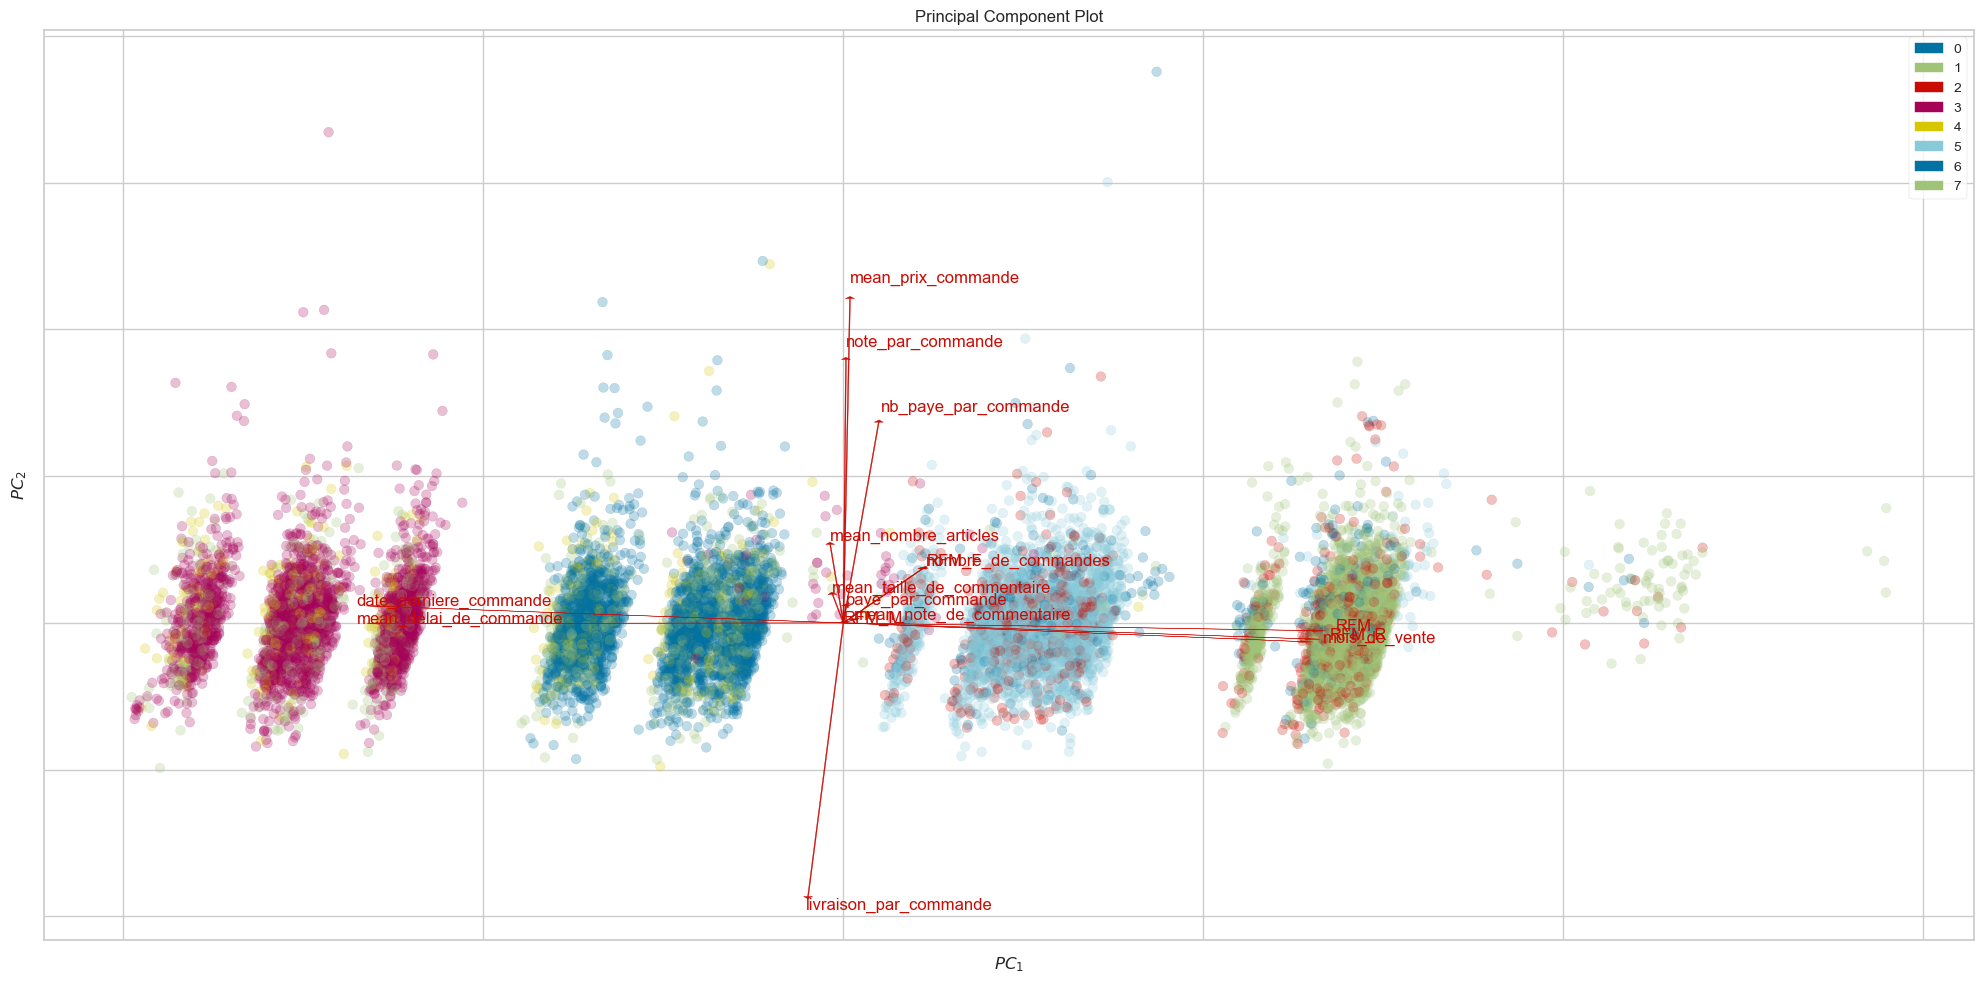

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [53]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA
plt.figure(figsize=(20, 10))

visualizer = PCA(projection = 2,proj_features=True,features = data_cluster.columns, random_state=1944, alpha=0.25)
visualizer.fit_transform(X_std , kmeans_labels)
plt.savefig('P2_075_PCA_Cluster_yellow.jpg')
visualizer.show()

On visualiser une réduction de dimension PCA en 3D avec des données clusterisées.

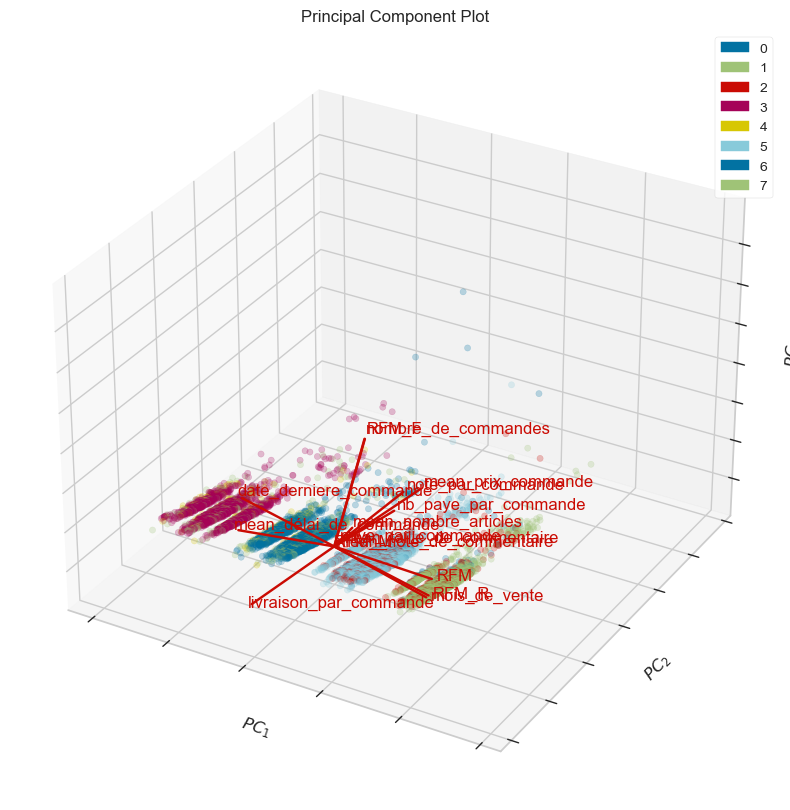

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [54]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA
plt.figure(figsize=(20, 10))

visualizer = PCA(projection = 3,proj_features=True,features = data_cluster.columns, random_state=1944, alpha=0.25)
visualizer.fit_transform(X_std , kmeans_labels)
#visualizer.fit_transform(X_std, dbs.labels_)
visualizer.show()

#### Réduction dimensionnelle - PCA


Nous allons entreprendre une Analyse en Composantes Principales (PCA) afin d'évaluer la possibilité de segmenter nos clients en utilisant un nombre réduit de variables. Notre but est de conserver une variance totale de 95%.

In [55]:
import numpy as np
from sklearn.decomposition import PCA

# Créez un objet PCA et ajustez-le à vos données
pca = PCA(n_components= 10 )
pca.fit(X_std)

# Obtenez les valeurs propres (explained variances)
explained_variances = pca.explained_variance_

# Calculez les ratios de variance expliquée
explained_variance_ratio = explained_variances / np.sum(explained_variances)

# Maintenant, vous pouvez accéder aux ratios de variance expliquée
print(explained_variance_ratio)


[0.61101515 0.18846694 0.07633153 0.0635347  0.01982236 0.01810215
 0.00895155 0.00807888 0.00357394 0.0021228 ]


In [56]:
# PCA Pipeline
pca = Pipeline([("preprocessor", MinMaxScaler()),
                ("pca", PCA(svd_solver='full'))])
pca.fit(X_std)
X_projected = pca.transform(X_std)


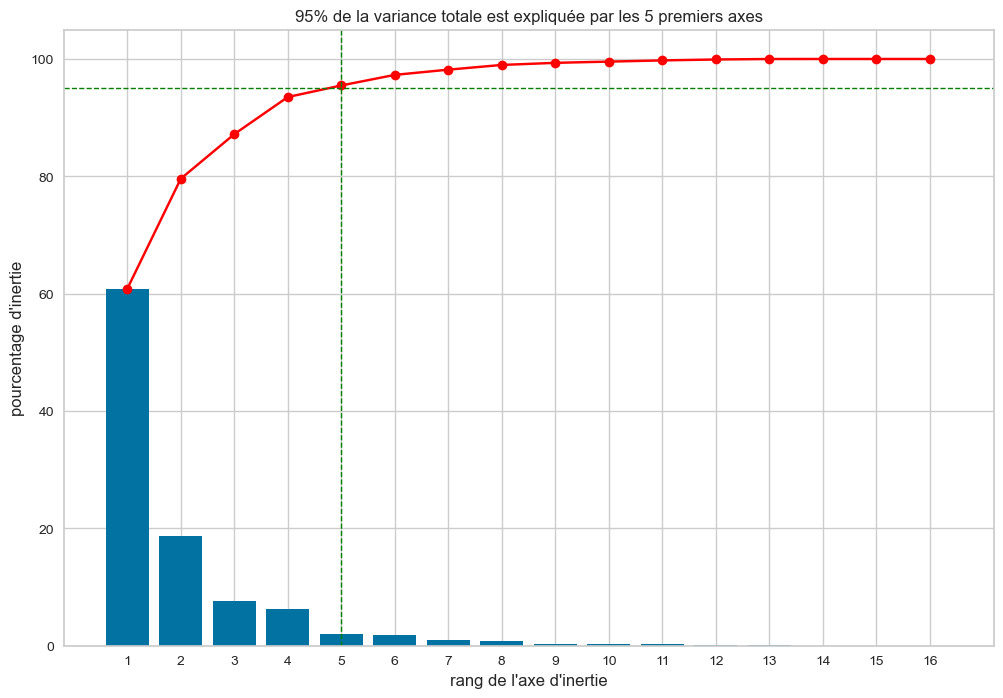

In [57]:
# Explained variance
scree = pca.named_steps['pca'].explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(scree))+1, scree)

cumSVar = scree.cumsum()
plt.plot(np.arange(len(scree))+1, cumSVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSVar >= limit)[0]
min_plans = valid_idx[cumSVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(scree))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)


On affiche le nombre de données attribuées à chaque cluster, ce qui vous donnera une idée de la distribution de vos données parmi les différents groupes de clusters.

In [58]:
data_cluster['cluster_label'] = kmeans_labels
data_cluster['cluster_label'] = data_cluster['cluster_label'] 
data_cluster['cluster_label'].value_counts()

5    2611
1    2602
3    2548
0    2497
7    1022
2     926
4     531
6     467
Name: cluster_label, dtype: int64

On parcourt chaque cluster de 0 à 7 et imprime des statistiques spécifiques pour chaque cluster, telles que les notes de commentaire, les tailles de commentaire et les valeurs RFM les plus courantes. Cela permet d'obtenir un aperçu des caractéristiques distinctives de chaque cluster.

In [59]:
for i in range(0,8):
    print('CLUSTER :', i)
    print(data_cluster.loc[(data_cluster.cluster_label==i),'mean_note_de_commentaire'].value_counts().head(5))
    print(data_cluster.loc[(data_cluster.cluster_label==i),'mean_taille_de_commentaire'].value_counts().head(5))
    print(data_cluster.loc[(data_cluster.cluster_label==i),'RFM'].value_counts().head(5))
    print("-----------------------------------------------------------------------------")

CLUSTER : 0
5.000000    1850
4.000000     645
3.666667       1
3.500000       1
Name: mean_note_de_commentaire, dtype: int64
0.0     1606
9.0       26
31.0      20
53.0      18
10.0      18
Name: mean_taille_de_commentaire, dtype: int64
7    2455
8      38
9       4
Name: RFM, dtype: int64
-----------------------------------------------------------------------------
CLUSTER : 1
5.000000    1974
4.000000     613
3.500000       6
4.500000       4
3.333333       1
Name: mean_note_de_commentaire, dtype: int64
0.0     1714
9.0       31
29.0      22
5.0       19
34.0      17
Name: mean_taille_de_commentaire, dtype: int64
9     2527
10      71
11       4
Name: RFM, dtype: int64
-----------------------------------------------------------------------------
CLUSTER : 2
3.000000    470
1.000000    326
2.000000    123
2.500000      3
1.666667      2
Name: mean_note_de_commentaire, dtype: int64
0.0     482
23.0     11
3.0      10
42.0     10
43.0      9
Name: mean_taille_de_commentaire, dtype: int6

#### Comparons la distribution des valeurs de la colonne dans différents clusters.

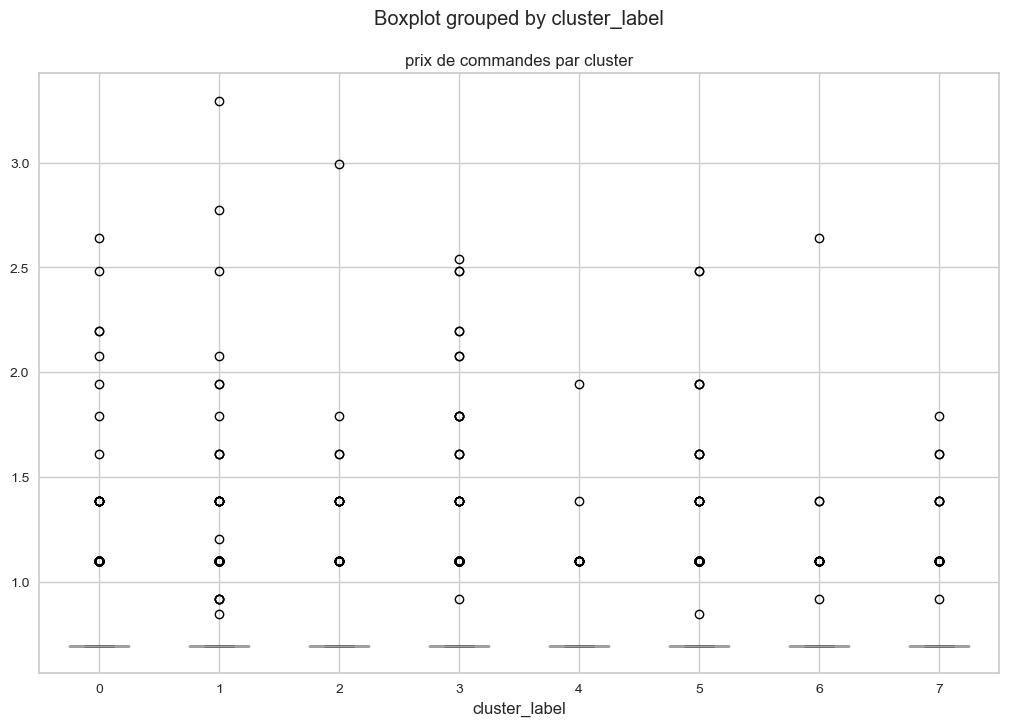

In [60]:
data_cluster.boxplot('paye_par_commande', by='cluster_label',  figsize=(12, 8))
plt.title('prix de commandes par cluster')
plt.savefig('P2_09_price_cluster.jpg')
plt.show()

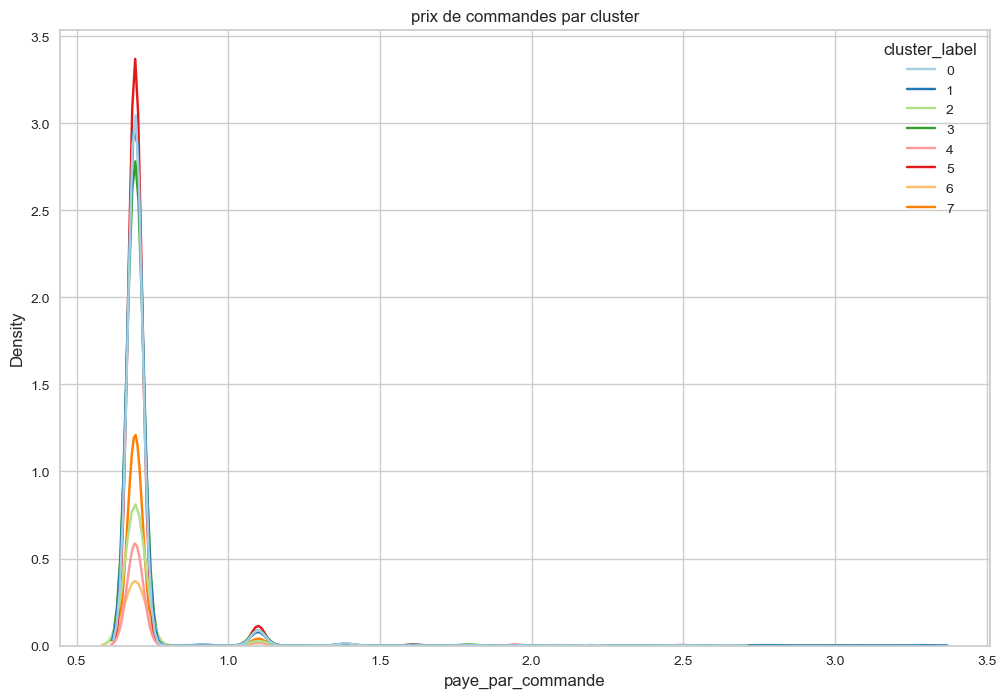

In [61]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x='paye_par_commande', data = data_cluster, hue = 'cluster_label', palette = 'Paired')
plt.title('prix de commandes par cluster')
plt.savefig('P2_10_Dist_price_cluster.jpg')
plt.show()

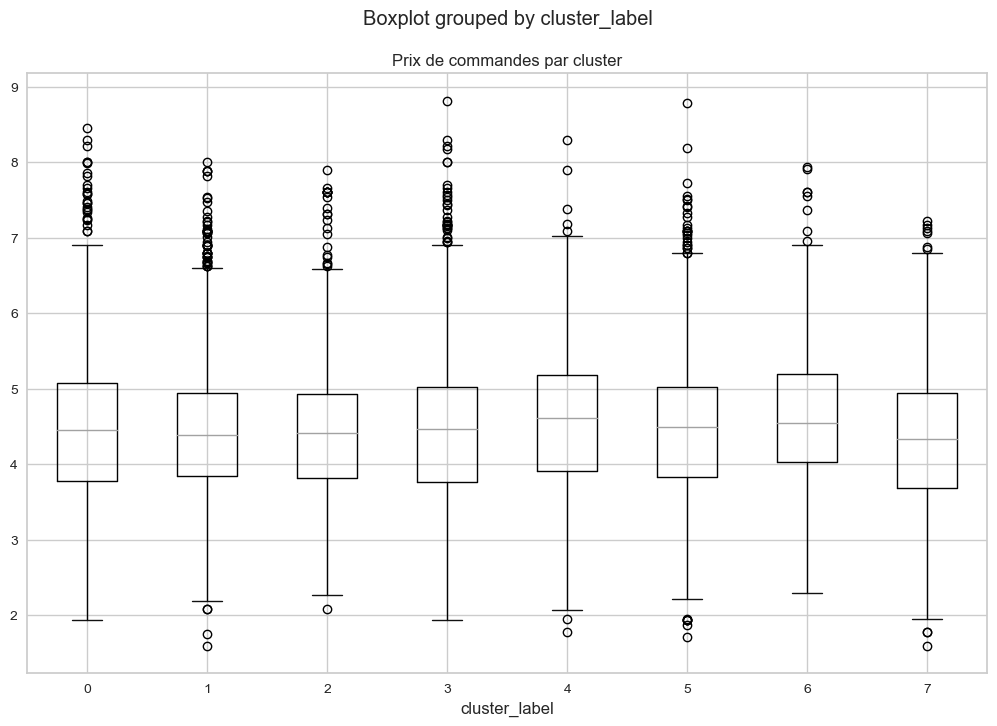

In [62]:
data_cluster.boxplot('mean_prix_commande', by='cluster_label',  figsize=(12, 8))
plt.title('Prix de commandes par cluster')
plt.savefig('P2_11_date_cluster.jpg')
plt.show()

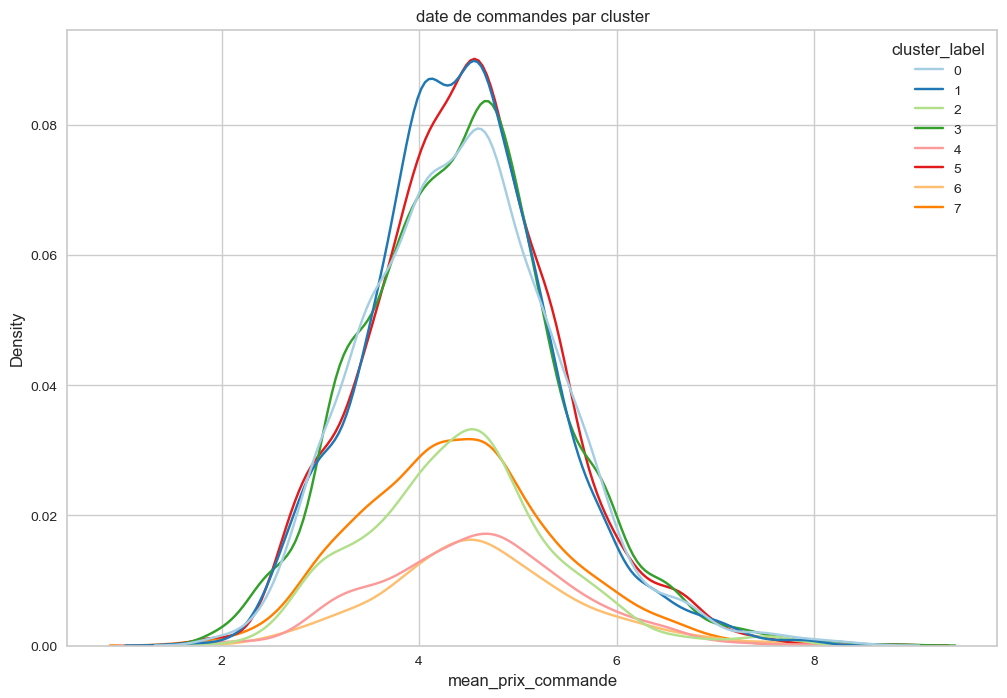

In [63]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x='mean_prix_commande', data = data_cluster, hue = 'cluster_label', palette = 'Paired')
plt.title('date de commandes par cluster')
plt.savefig('P2_12_Dist_date_cluster.jpg')
plt.show()

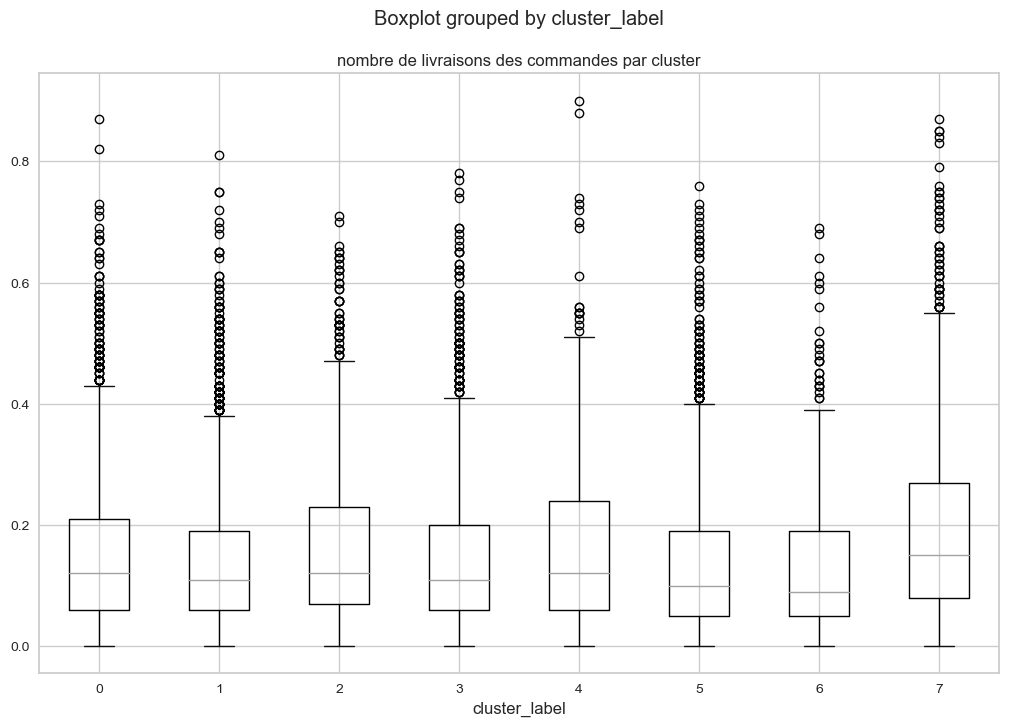

In [64]:
data_cluster.boxplot('livraison_par_commande', by='cluster_label',  figsize=(12, 8))
plt.title('nombre de livraisons des commandes par cluster')
plt.savefig('P2_13_nbpaie_cluster.jpg')
plt.show()

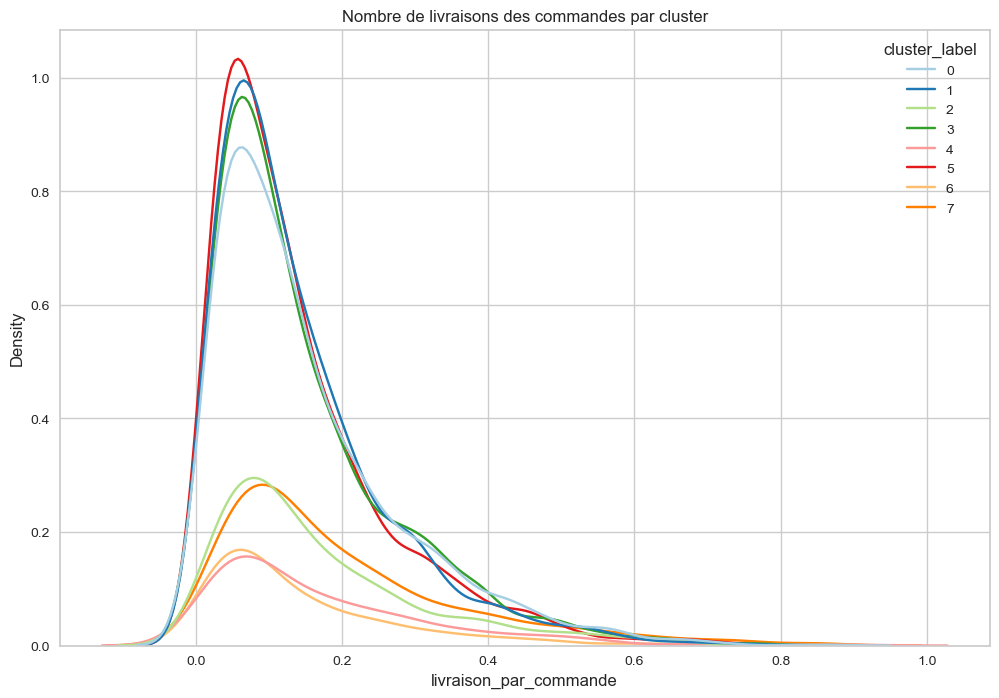

In [65]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x='livraison_par_commande', data = data_cluster, hue = 'cluster_label', palette = 'Paired')
plt.title('Nombre de livraisons des commandes par cluster')
plt.savefig('P2_14_Dist_nbpaie_cluster.jpg')
plt.show()

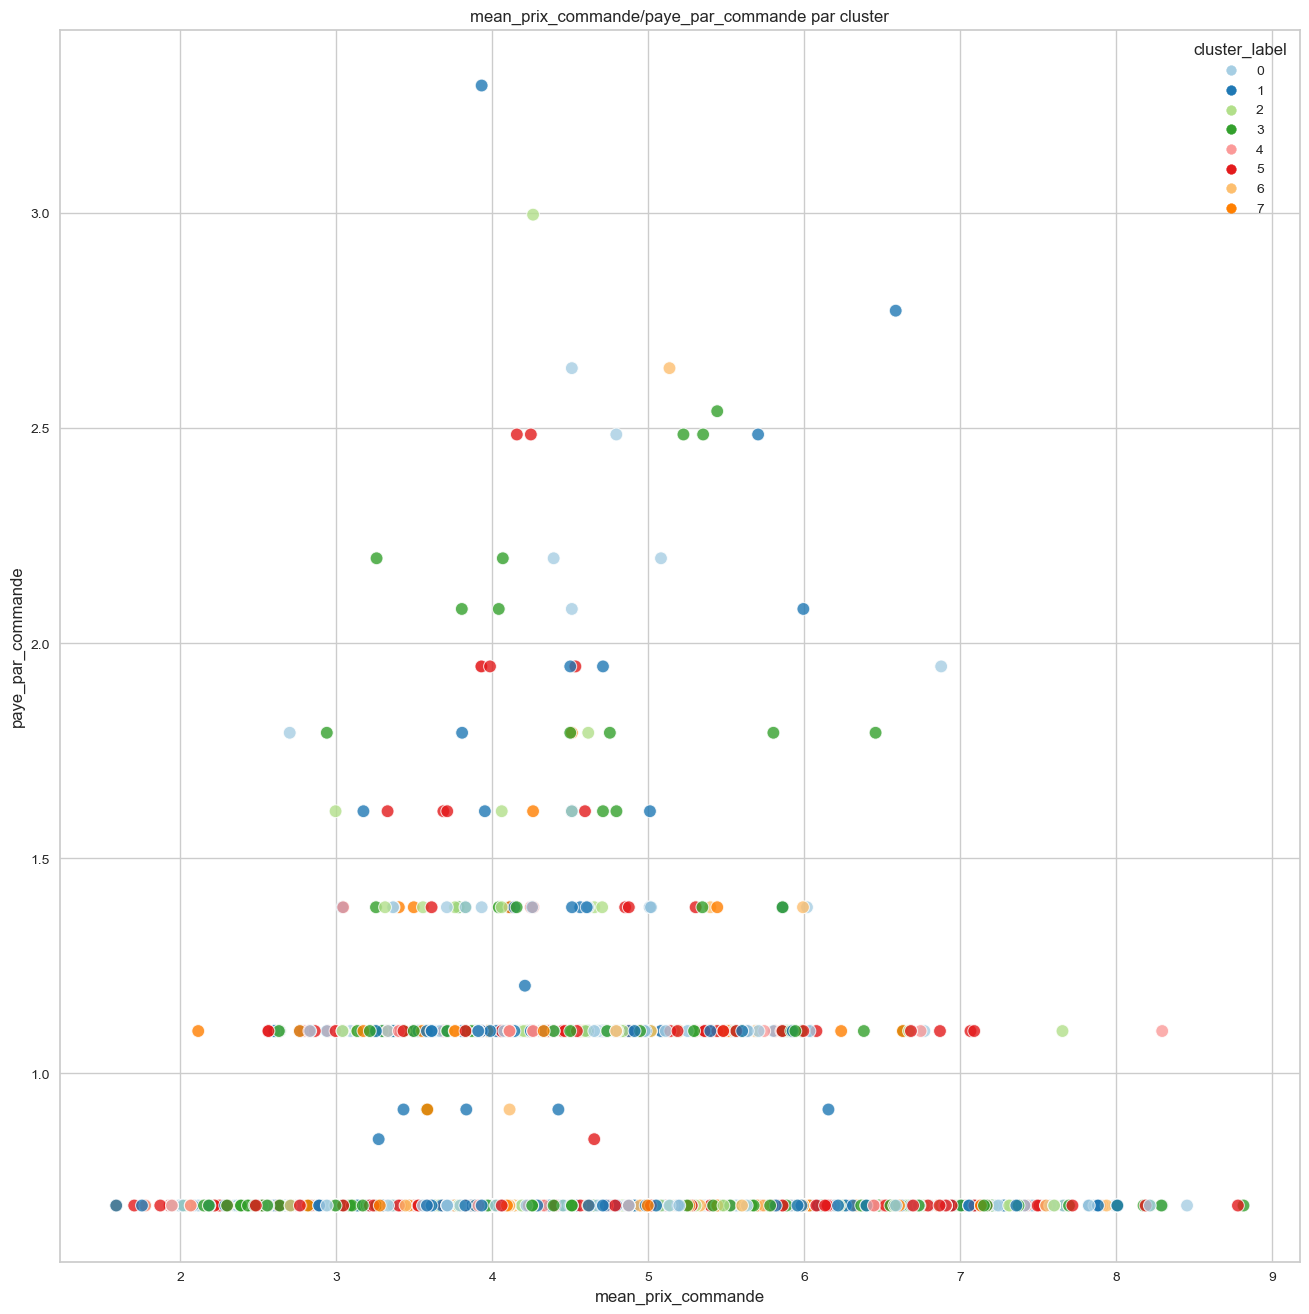

In [66]:
data_cluster['cluster_label'] = kmeans_labels
data_cluster['cluster_label'] = data_cluster['cluster_label'].astype('category')
plt.figure(figsize=(16,16))
sns.scatterplot(data=data_cluster, x='mean_prix_commande', y='paye_par_commande',
                hue='cluster_label', s=85, alpha=0.8, palette='Paired')
plt.title('mean_prix_commande/paye_par_commande par cluster')
plt.savefig('P2_19_prix_date_cluster.jpg')
plt.show()

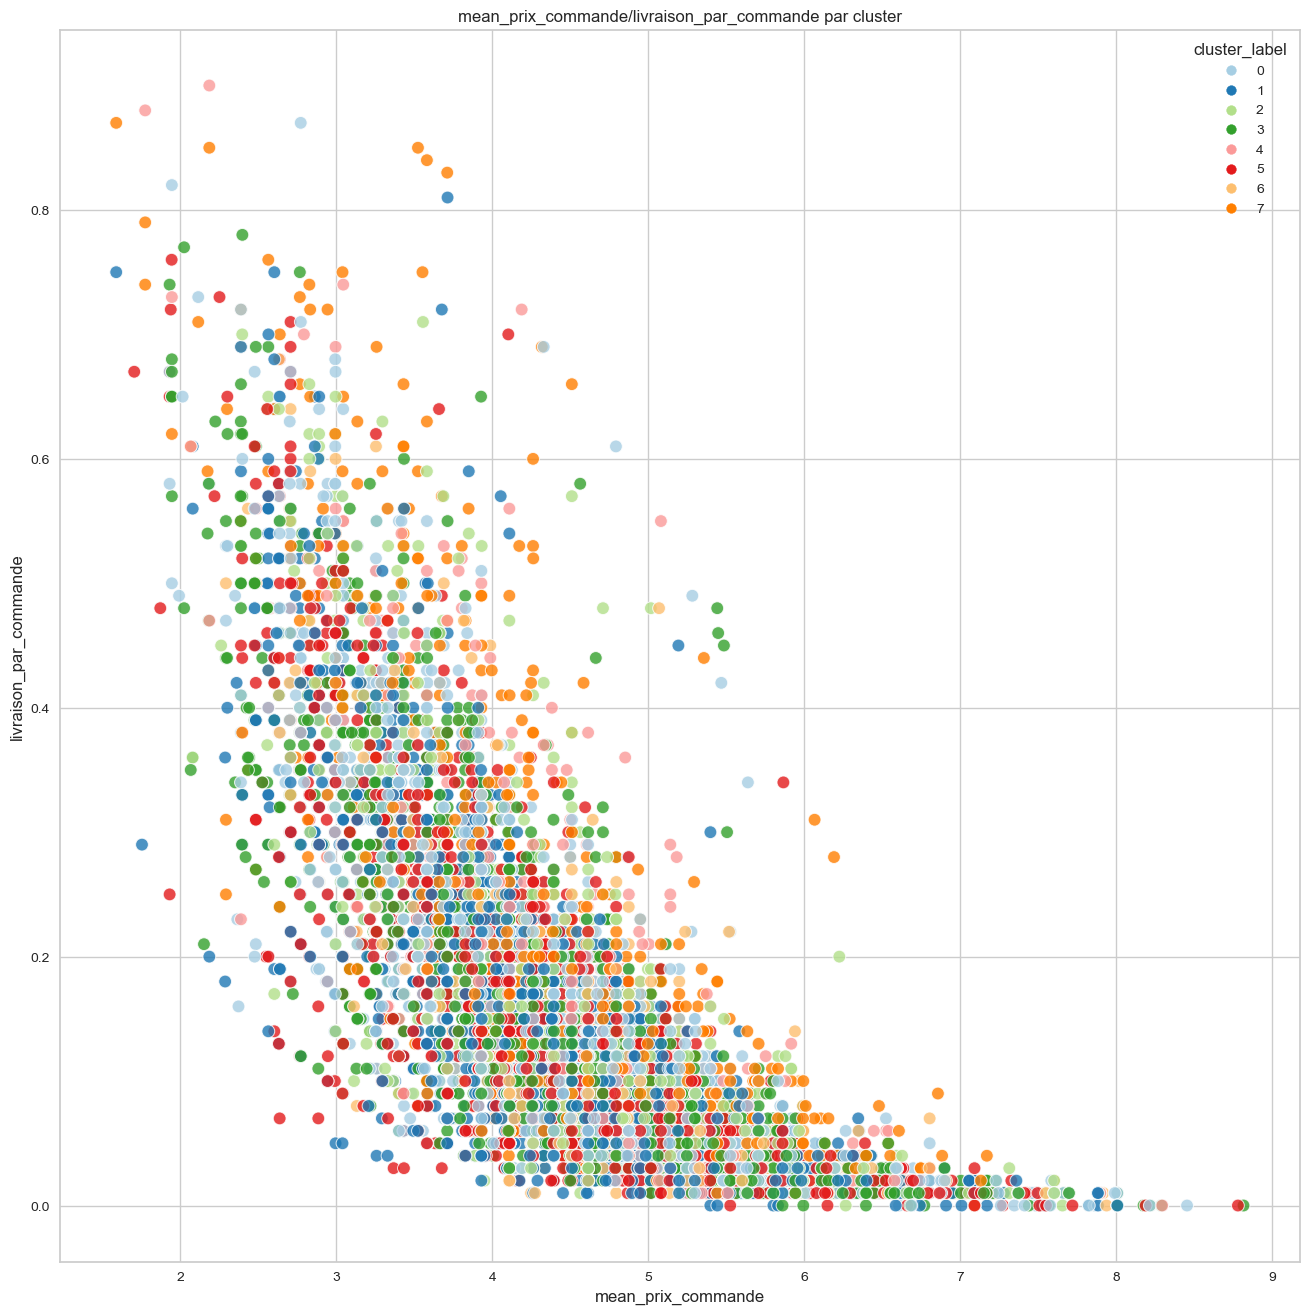

In [67]:
# Crée une nouvelle figure avec une taille de 16 pouces de largeur et 16 pouces de hauteur.
plt.figure(figsize=(16,16))
sns.scatterplot(data=data_cluster, x='mean_prix_commande', y='livraison_par_commande',
                hue='cluster_label', s=85, alpha=0.8, palette='Paired')
# Ajoute un titre au graphique pour indiquer ce qu'il représente.
plt.title('mean_prix_commande/livraison_par_commande par cluster')
# Sauvegarde le graphique en tant qu'image JPEG sous le nom "P2_19_prix_delai_cluster.jpg".
plt.savefig('P2_19_prix_delai_cluster.jpg')
# Affiche le graphique à l'écran.
plt.show()

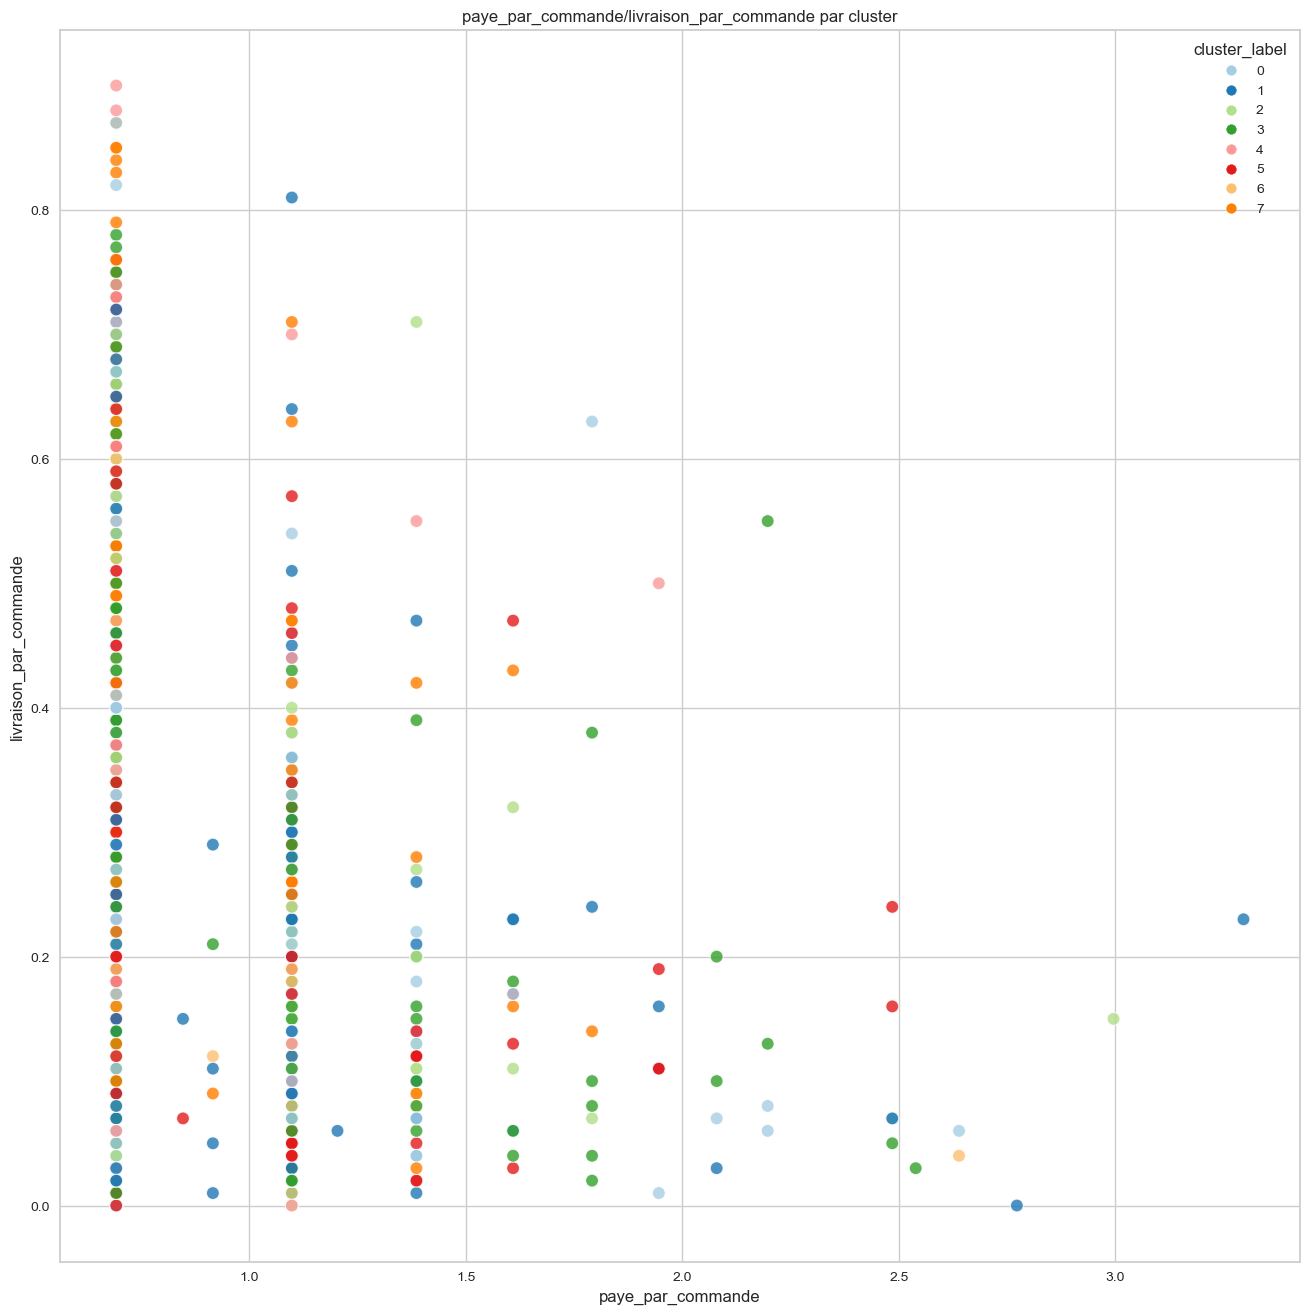

In [68]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=data_cluster, x='paye_par_commande', y='livraison_par_commande',
                hue='cluster_label', s=85, alpha=0.8, palette='Paired')
plt.title('paye_par_commande/livraison_par_commande par cluster')
plt.savefig('P2_19_date_delai_cluster.jpg')
plt.show()

In [69]:
data_cluster.head(10)

nombre_de_commandes  note_par_commande  paye_par_commande  \
2                     1              95.00           0.693147   
8                     1             139.00           0.693147   
26                    1              70.99           0.693147   
27                    1             287.00           0.693147   
28                    1             182.33           0.693147   
34                    1              62.90           0.693147   
41                    1              27.88           0.693147   
46                    1              35.88           0.693147   
47                    1             200.99           0.693147   
59                    1              58.90           0.693147   

    nb_paye_par_commande  mean_note_de_commentaire  \
2                    8.0                       3.0   
8                    3.0                       4.0   
26                   1.0                       4.0   
27                  10.0                       3.0   
28                   3.0                       5.0   
34                   2.0                       3.0   
41                   1.0                       4.0   
46                   3.0                       3.0   
47                   4.0                       4.0   
59                   1.0                       2.0   

    mean_taille_de_commentaire  mois_de_vente  mean_nombre_articles  \
2                          0.0              3                   1.0   
8                          0.0              3                   1.0   
26                         0.0              1                   1.0   
27                         0.0              4                   1.0   
28                        48.0              6                   1.0   
34                         0.0              4                   1.0   
41                         0.0              6                   1.0   
46                         0.0              3                   1.0   
47                         0.0              3                   1.0   
59                        21.0              2                   1.0   

    livraison_par_commande  mean_prix_commande  date_derniere_commande  \
2                     0.27            4.248495                0.763936   
8                     0.03            4.912655                0.785565   
26                    0.15            4.110710                0.939828   
27                    0.06            5.598422                0.513939   
28                    0.04            5.166670                0.018984   
34                    0.24            3.889777                0.543305   
41                    0.11            3.253470                0.007760   
46                    0.31            3.253470                0.720583   
47                    0.12            5.181727                0.680606   
59                    0.15            3.929863                0.900724   

    mean_délai_de_commande  RFM_R  RFM_F  RFM_M  RFM cluster_label  
2                 0.768116      1      1      4    6             7  
8                 0.789855      1      1      4    6             3  
26                0.942029      1      1      4    6             3  
27                0.522727      2      1      4    7             7  
28                0.234101      4      1      4    9             1  
34                0.551136      2      1      4    7             7  
41                0.233553      4      1      4    9             1  
46                0.727273      2      1      4    7             7  
47                0.687500      2      1      4    7             0  
59                0.902174      1      1      4    6             7